In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv("datasets/CPIndex_Jan15-To-Jan24.csv")
df1.drop(columns=["Unnamed: 6" , "Status"], inplace=True)
df1

Year      Month        Item-Code               Description  \
0      2015    January  1.1.01.1.1.01.P                  rice_PDS   
1      2015   February  1.1.01.1.1.01.P                  rice_PDS   
2      2015      March  1.1.01.1.1.01.P                  rice_PDS   
3      2015      April  1.1.01.1.1.01.P                  rice_PDS   
4      2015        May  1.1.01.1.1.01.P                  rice_PDS   
...     ...        ...              ...                       ...   
30452  2023  September  6.1.06.3.2.01.X  barber; beautician; etc.   
30453  2023    October  6.1.06.3.2.01.X  barber; beautician; etc.   
30454  2023   November  6.1.06.3.2.01.X  barber; beautician; etc.   
30455  2023   December  6.1.06.3.2.01.X  barber; beautician; etc.   
30456  2024    January  6.1.06.3.2.01.X  barber; beautician; etc.   

       Combined Inflation  
0                   -1.66  
1                   -4.42  
2                   -4.42  
3                   -4.65  
4                   -4.65  
...                   ...  
30452                6.10  
30453                5.52  
30454                5.05  
30455                4.79  
30456                4.43  

[30457 rows x 5 columns]

In [4]:
len(df1["Description"].unique())

299

In [5]:
df2 = pd.read_csv("datasets/CPIndex_Jan13-To-Jan24.csv")
df2.drop(columns=["Unnamed: 10" , "Status", "State" , "Group", "Sub Group"], inplace=True)
df2

Year      Month                Description  Rural  Urban  Combined
0     2013    January       Cereals and products  107.5  110.5     108.4
1     2013   February       Cereals and products  109.2  112.9     110.4
2     2013      March       Cereals and products  110.2  113.9     111.4
3     2013      April       Cereals and products  110.2  114.6     111.6
4     2013        May       Cereals and products  110.9  115.4     112.3
...    ...        ...                        ...    ...    ...       ...
3719  2023  September  Consumer Food Price Index  186.1  192.5     188.4
3720  2023    October  Consumer Food Price Index  188.1  194.7     190.4
3721  2023   November  Consumer Food Price Index  190.1  196.8     192.4
3722  2023   December  Consumer Food Price Index  188.4  194.9     190.7
3723  2024    January  Consumer Food Price Index  187.0  193.4     189.3

[3724 rows x 6 columns]

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3724 non-null   int64  
 1   Month        3724 non-null   object 
 2   Description  3724 non-null   object 
 3   Rural        3593 non-null   float64
 4   Urban        3724 non-null   float64
 5   Combined     3714 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 174.7+ KB


In [7]:
df2.describe()

Year        Rural        Urban     Combined
count  3724.000000  3593.000000  3724.000000  3714.000000
mean   2018.045113   143.287754   141.374409   142.325390
std       3.193148    25.896608    26.690628    25.674106
min    2013.000000     0.000000    85.300000    90.400000
25%    2015.000000   122.600000   120.500000   121.825000
50%    2018.000000   139.800000   136.300000   138.400000
75%    2021.000000   161.600000   159.700000   160.700000
max    2024.000000   249.800000   295.300000   250.200000

In [8]:
# Extract rows where 'Rural' column is NaN
nan_rows = df2[df2['Rural'].isna()]
nan_rows

Year      Month Description  Rural  Urban  Combined
2261  2013    January     Housing    NaN  100.3     100.3
2262  2013   February     Housing    NaN  100.4     100.4
2263  2013      March     Housing    NaN  100.4     100.4
2264  2013      April     Housing    NaN  100.5     100.5
2265  2013        May     Housing    NaN  100.5     100.5
...    ...        ...         ...    ...    ...       ...
2389  2023  September     Housing    NaN  176.2     176.2
2390  2023    October     Housing    NaN  177.7     177.7
2391  2023   November     Housing    NaN  177.9     177.9
2392  2023   December     Housing    NaN  176.9     176.9
2393  2024    January     Housing    NaN  177.6     177.6

[131 rows x 6 columns]

In [9]:
nan_rows["Description"].unique()

array(['Housing'], dtype=object)

In [10]:
# Extract rows where 'Rural' column is NaN
nan_rows = df2[df2['Combined'].isna()]
nan_rows

Year      Month Description  Rural  Urban  Combined
2332  2018   December     Housing    NaN  146.5       NaN
2333  2019    January     Housing    NaN  147.7       NaN
2334  2019   February     Housing    NaN  148.5       NaN
2335  2019      March     Housing    NaN  149.0       NaN
2336  2019      April     Housing    NaN  149.7       NaN
2337  2019        May     Housing    NaN  150.1       NaN
2338  2019       June     Housing    NaN  149.4       NaN
2339  2019       July     Housing    NaN  150.6       NaN
2340  2019     August     Housing    NaN  151.6       NaN
2341  2019  September     Housing    NaN  152.2       NaN

In [11]:
df2['Rural'] = df2['Rural'].fillna(0)
df2['Combined'] = df2['Combined'].fillna(df2['Urban'])
df2.isnull().sum()

Year           0
Month          0
Description    0
Rural          0
Urban          0
Combined       0
dtype: int64

In [12]:
len(df2["Description"].unique())

28

In [13]:
df2.isnull().sum()

Year           0
Month          0
Description    0
Rural          0
Urban          0
Combined       0
dtype: int64

In [14]:
df2

Year      Month                Description  Rural  Urban  Combined
0     2013    January       Cereals and products  107.5  110.5     108.4
1     2013   February       Cereals and products  109.2  112.9     110.4
2     2013      March       Cereals and products  110.2  113.9     111.4
3     2013      April       Cereals and products  110.2  114.6     111.6
4     2013        May       Cereals and products  110.9  115.4     112.3
...    ...        ...                        ...    ...    ...       ...
3719  2023  September  Consumer Food Price Index  186.1  192.5     188.4
3720  2023    October  Consumer Food Price Index  188.1  194.7     190.4
3721  2023   November  Consumer Food Price Index  190.1  196.8     192.4
3722  2023   December  Consumer Food Price Index  188.4  194.9     190.7
3723  2024    January  Consumer Food Price Index  187.0  193.4     189.3

[3724 rows x 6 columns]

In [15]:
df2.isnull().sum()

Year           0
Month          0
Description    0
Rural          0
Urban          0
Combined       0
dtype: int64

In [16]:
df2['year_month'] = df2['Year'].astype(str) + "-" + df2['Month'].astype(str)
df2.drop(columns=["Year" , "Month"], inplace=True)
df2['year_month'] = pd.to_datetime(df2['year_month'], format='%Y-%B')
df2.set_index('year_month', inplace=True)

In [17]:
df2

Description  Rural  Urban  Combined
year_month                                                   
2013-01-01       Cereals and products  107.5  110.5     108.4
2013-02-01       Cereals and products  109.2  112.9     110.4
2013-03-01       Cereals and products  110.2  113.9     111.4
2013-04-01       Cereals and products  110.2  114.6     111.6
2013-05-01       Cereals and products  110.9  115.4     112.3
...                               ...    ...    ...       ...
2023-09-01  Consumer Food Price Index  186.1  192.5     188.4
2023-10-01  Consumer Food Price Index  188.1  194.7     190.4
2023-11-01  Consumer Food Price Index  190.1  196.8     192.4
2023-12-01  Consumer Food Price Index  188.4  194.9     190.7
2024-01-01  Consumer Food Price Index  187.0  193.4     189.3

[3724 rows x 4 columns]

In [18]:
df2['combined_inf_percentage'] = df2['Combined'].pct_change() * 100
df2['rural_inf_percentage'] = df2['Rural'].pct_change() * 100
df2['urban_inf_percentage'] = df2['Urban'].pct_change() * 100

In [19]:
df2['combined_inf_percentage'] = df2["combined_inf_percentage"].fillna(0)
df2['rural_inf_percentage'] = df2["rural_inf_percentage"].fillna(0)
df2['urban_inf_percentage'] = df2["urban_inf_percentage"].fillna(0)

In [20]:
df2

Description  Rural  Urban  Combined  \
year_month                                                      
2013-01-01       Cereals and products  107.5  110.5     108.4   
2013-02-01       Cereals and products  109.2  112.9     110.4   
2013-03-01       Cereals and products  110.2  113.9     111.4   
2013-04-01       Cereals and products  110.2  114.6     111.6   
2013-05-01       Cereals and products  110.9  115.4     112.3   
...                               ...    ...    ...       ...   
2023-09-01  Consumer Food Price Index  186.1  192.5     188.4   
2023-10-01  Consumer Food Price Index  188.1  194.7     190.4   
2023-11-01  Consumer Food Price Index  190.1  196.8     192.4   
2023-12-01  Consumer Food Price Index  188.4  194.9     190.7   
2024-01-01  Consumer Food Price Index  187.0  193.4     189.3   

            combined_inf_percentage  rural_inf_percentage  \
year_month                                                  
2013-01-01                 0.000000              0.000000   
2013-02-01                 1.845018              1.581395   
2013-03-01                 0.905797              0.915751   
2013-04-01                 0.179533              0.000000   
2013-05-01                 0.627240              0.635209   
...                             ...                   ...   
2023-09-01                -2.129870             -1.742344   
2023-10-01                 1.061571              1.074691   
2023-11-01                 1.050420              1.063264   
2023-12-01                -0.883576             -0.894266   
2024-01-01                -0.734137             -0.743100   

            urban_inf_percentage  
year_month                        
2013-01-01              0.000000  
2013-02-01              2.171946  
2013-03-01              0.885740  
2013-04-01              0.614574  
2013-05-01              0.698080  
...                          ...  
2023-09-01             -2.875883  
2023-10-01              1.142857  
2023-11-01              1.078582  
2023-12-01             -0.965447  
2024-01-01             -0.769625  

[3724 rows x 7 columns]

In [21]:
df2.to_csv("datasets/main_df.csv")

In [22]:
def filter_by_date(dataframe, start_date, end_date, commodity):
    dataframe = pd.read_csv("datasets/main_df.csv")
    filtered_df = dataframe[(dataframe['year_month'] >= start_date) & (dataframe['year_month'] <= end_date)]
    filtered_df = filtered_df[filtered_df["Description"] == commodity]
    return filtered_df['combined_inf_percentage']

# Test the function with a sample date range
sample_start_date = '2013-02-01'
sample_end_date = '2013-05-01'
sample_filtered_rates = filter_by_date(df2, sample_start_date, sample_end_date, commodity = "Cereals and products")
print(sample_filtered_rates.head())

1    1.845018
2    0.905797
3    0.179533
4    0.627240
Name: combined_inf_percentage, dtype: float64


In [23]:
df2[df2["Description"] == "Cereals and products"]

Description  Rural  Urban  Combined  \
year_month                                                 
2013-01-01  Cereals and products  107.5  110.5     108.4   
2013-02-01  Cereals and products  109.2  112.9     110.4   
2013-03-01  Cereals and products  110.2  113.9     111.4   
2013-04-01  Cereals and products  110.2  114.6     111.6   
2013-05-01  Cereals and products  110.9  115.4     112.3   
...                          ...    ...    ...       ...   
2023-09-01  Cereals and products  181.4  181.3     181.4   
2023-10-01  Cereals and products  183.0  182.7     182.9   
2023-11-01  Cereals and products  184.8  184.2     184.6   
2023-12-01  Cereals and products  186.2  185.6     186.0   
2024-01-01  Cereals and products  187.6  187.0     187.4   

            combined_inf_percentage  rural_inf_percentage  \
year_month                                                  
2013-01-01                 0.000000              0.000000   
2013-02-01                 1.845018              1.581395   
2013-03-01                 0.905797              0.915751   
2013-04-01                 0.179533              0.000000   
2013-05-01                 0.627240              0.635209   
...                             ...                   ...   
2023-09-01                 1.171221              1.340782   
2023-10-01                 0.826902              0.882029   
2023-11-01                 0.929470              0.983607   
2023-12-01                 0.758397              0.757576   
2024-01-01                 0.752688              0.751880   

            urban_inf_percentage  
year_month                        
2013-01-01              0.000000  
2013-02-01              2.171946  
2013-03-01              0.885740  
2013-04-01              0.614574  
2013-05-01              0.698080  
...                          ...  
2023-09-01              0.834260  
2023-10-01              0.772201  
2023-11-01              0.821018  
2023-12-01              0.760043  
2024-01-01              0.754310  

[133 rows x 7 columns]

In [24]:
# Define a function to calculate percentage change
def calculate_percentage_change(group):
    group['combined_inf_percentage'] = group['Combined'].pct_change().fillna(0) * 100
    group['rural_inf_percentage'] = group['Rural'].pct_change().fillna(0) * 100
    group['urban_inf_percentage'] = group['Urban'].pct_change().fillna(0) * 100
    group.iloc[0, group.columns.get_loc('combined_inf_percentage')] = 0
    group.iloc[0, group.columns.get_loc('rural_inf_percentage')] = 0
    group.iloc[0, group.columns.get_loc('urban_inf_percentage')] = 0
    return group

# Apply the function to each group, grouped by 'Description'
df = df2.groupby('Description', as_index=False).apply(calculate_percentage_change)

# Reset the index if necessa
df = df.reset_index()

In [25]:
df = df.reset_index()
df.drop(columns=["level_0", "index"], inplace=True)
df['year_month'] = pd.to_datetime(df['year_month'])
df.set_index(['year_month'], inplace=True)

In [26]:
df[df["Description"]=="Sugar and confectionery"]

Description  Rural  Urban  Combined  \
year_month                                                    
2013-01-01  Sugar and confectionery  106.8  105.1     106.2   
2013-02-01  Sugar and confectionery  105.7  103.8     105.1   
2013-03-01  Sugar and confectionery  105.0  102.6     104.2   
2013-04-01  Sugar and confectionery  104.2  102.0     103.5   
2013-05-01  Sugar and confectionery  103.7  101.9     103.1   
...                             ...    ...    ...       ...   
2023-09-01  Sugar and confectionery  126.6  128.4     127.2   
2023-10-01  Sugar and confectionery  128.1  129.7     128.6   
2023-11-01  Sugar and confectionery  129.7  130.9     130.1   
2023-12-01  Sugar and confectionery  130.2  131.4     130.6   
2024-01-01  Sugar and confectionery  129.7  131.1     130.2   

            combined_inf_percentage  rural_inf_percentage  \
year_month                                                  
2013-01-01                 0.000000              0.000000   
2013-02-01                -1.035782             -1.029963   
2013-03-01                -0.856327             -0.662252   
2013-04-01                -0.671785             -0.761905   
2013-05-01                -0.386473             -0.479846   
...                             ...                   ...   
2023-09-01                 1.354582              1.442308   
2023-10-01                 1.100629              1.184834   
2023-11-01                 1.166407              1.249024   
2023-12-01                 0.384320              0.385505   
2024-01-01                -0.306279             -0.384025   

            urban_inf_percentage  
year_month                        
2013-01-01              0.000000  
2013-02-01             -1.236917  
2013-03-01             -1.156069  
2013-04-01             -0.584795  
2013-05-01             -0.098039  
...                          ...  
2023-09-01              1.102362  
2023-10-01              1.012461  
2023-11-01              0.925212  
2023-12-01              0.381971  
2024-01-01             -0.228311  

[133 rows x 7 columns]

In [27]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# A function to train a SARIMAX model for a given category
def train_model_for_category(dataframe, category):
    category_df = dataframe[dataframe['Description'] == category]
    model = SARIMAX(category_df['combined_inf_percentage'], 
                    order=(1, 1, 1), 
                    seasonal_order=(1, 1, 1, 12),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    return model_fit

# Train a model for each category and store it in a dictionary
models = {}
categories = df['Description'].unique()
for category in categories:
    print(f"Training model for {category}")
    models[category] = train_model_for_category(df, category)

# Forecasting function
def forecast_inflation(models, category, steps=12):
    model = models.get(category)
    if model:
        forecast = model.get_forecast(steps=steps)
        return forecast
    else:
        raise ValueError("Model for this category does not exist")


Training model for Cereals and products
Training model for Clothing
Training model for Clothing and footwear
Training model for Consumer Food Price Index
Training model for Education
Training model for Egg
Training model for Food and beverages
Training model for Footwear
Training model for Fruits
Training model for Fuel and light
Training model for General Index (All Groups)
Training model for Health
Training model for Household goods and services
Training model for Housing
Training model for Meat and fish
Training model for Milk and products
Training model for Miscellaneous
Training model for Non-alcoholic beverages
Training model for Oils and fats
Training model for Pan; tobacco; and intoxicants
Training model for Personal care and effects
Training model for Prepared meals; snacks; sweets etc.
Training model for Pulses and products
Training model for Recreation and amusement
Training model for Spices
Training model for Sugar and confectionery
Training model for Transport and communic

In [28]:
models

{'Cereals and products': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x17fe2d7d0>,
 'Clothing': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x28205a910>,
 'Clothing and footwear': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x282048290>,
 'Consumer Food Price Index': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x282024250>,
 'Education': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x28200bd10>,
 'Egg': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x282068bd0>,
 'Food and beverages': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x2820b1550>,
 'Footwear': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x2820dc6d0>,
 'Fruits': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x2820f6650>,
 'Fuel and light': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x17fecc050>,
 'General Index (All Groups)': <statsmodels.tsa.statespace.sarimax.S

In [29]:
df = df.reset_index()

In [30]:
df

year_month           Description  Rural  Urban  Combined  \
0    2013-01-01  Cereals and products  107.5  110.5     108.4   
1    2013-02-01  Cereals and products  109.2  112.9     110.4   
2    2013-03-01  Cereals and products  110.2  113.9     111.4   
3    2013-04-01  Cereals and products  110.2  114.6     111.6   
4    2013-05-01  Cereals and products  110.9  115.4     112.3   
...         ...                   ...    ...    ...       ...   
3719 2023-09-01            Vegetables  184.5  225.5     198.4   
3720 2023-10-01            Vegetables  190.5  234.1     205.3   
3721 2023-11-01            Vegetables  199.9  246.0     215.5   
3722 2023-12-01            Vegetables  188.4  234.6     204.1   
3723 2024-01-01            Vegetables  179.8  226.0     195.5   

      combined_inf_percentage  rural_inf_percentage  urban_inf_percentage  
0                    0.000000              0.000000              0.000000  
1                    1.845018              1.581395              2.171946  
2                    0.905797              0.915751              0.885740  
3                    0.179533              0.000000              0.614574  
4                    0.627240              0.635209              0.698080  
...                       ...                   ...                   ...  
3719               -15.717927            -14.741220            -17.186926  
3720                 3.477823              3.252033              3.813747  
3721                 4.968339              4.934383              5.083298  
3722                -5.290023             -5.752876             -4.634146  
3723                -4.213621             -4.564756             -3.665814  

[3724 rows x 8 columns]

In [31]:
df = df.set_index(df["year_month"])
df.drop(columns=["year_month"], inplace = True)
df

Description  Rural  Urban  Combined  \
year_month                                                 
2013-01-01  Cereals and products  107.5  110.5     108.4   
2013-02-01  Cereals and products  109.2  112.9     110.4   
2013-03-01  Cereals and products  110.2  113.9     111.4   
2013-04-01  Cereals and products  110.2  114.6     111.6   
2013-05-01  Cereals and products  110.9  115.4     112.3   
...                          ...    ...    ...       ...   
2023-09-01            Vegetables  184.5  225.5     198.4   
2023-10-01            Vegetables  190.5  234.1     205.3   
2023-11-01            Vegetables  199.9  246.0     215.5   
2023-12-01            Vegetables  188.4  234.6     204.1   
2024-01-01            Vegetables  179.8  226.0     195.5   

            combined_inf_percentage  rural_inf_percentage  \
year_month                                                  
2013-01-01                 0.000000              0.000000   
2013-02-01                 1.845018              1.581395   
2013-03-01                 0.905797              0.915751   
2013-04-01                 0.179533              0.000000   
2013-05-01                 0.627240              0.635209   
...                             ...                   ...   
2023-09-01               -15.717927            -14.741220   
2023-10-01                 3.477823              3.252033   
2023-11-01                 4.968339              4.934383   
2023-12-01                -5.290023             -5.752876   
2024-01-01                -4.213621             -4.564756   

            urban_inf_percentage  
year_month                        
2013-01-01              0.000000  
2013-02-01              2.171946  
2013-03-01              0.885740  
2013-04-01              0.614574  
2013-05-01              0.698080  
...                          ...  
2023-09-01            -17.186926  
2023-10-01              3.813747  
2023-11-01              5.083298  
2023-12-01             -4.634146  
2024-01-01             -3.665814  

[3724 rows x 7 columns]

In [32]:
# import pandas as pd
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

# # A function to train and forecast using a SARIMAX model for a given category
# def train_and_forecast(dataframe, category, steps=12):
# # Ensure the index is a datetime index (this seems to be redundant as you mentioned it's already datetime)
#     if not isinstance(dataframe.index, pd.DatetimeIndex):
#         dataframe.index = pd.to_datetime(dataframe.index)
    
#     category_df = dataframe[dataframe['Description'] == category]
    
#     forecast = forecast_inflation(models, category)
    
#     # Debug: Print the index of the forecast to verify its type and values
#     print("Forecast index type:", type(forecast.predicted_mean.index))
#     print("Forecast index values:", forecast.predicted_mean.index)
    
#     # Get confidence intervals for the forecasts
#     forecast_ci = forecast.conf_int()
    
#     # Plot the historical data
#     category_df['combined_inf_percentage'].plot(label='Observed', figsize=(10,5))
    
#     # Plot the forecast along with the confidence interval
#     forecast.predicted_mean.plot(ax=plt.gca(), label='Forecast')
#     plt.fill_between(forecast_ci.index,
#                      forecast_ci.iloc[:, 0],
#                      forecast_ci.iloc[:, 1], color='k', alpha=0.25)
    
#     # Add title and labels
#     plt.title(f'Inflation Forecast for {category}')
#     plt.xlabel('Date')
#     plt.ylabel('Inflation Percentage')
    

#     # Ensure x-axis ticks are displayed with a specific rotation for better readability
#     plt.xticks(rotation=45)
#     plt.tight_layout()

#     plt.legend()
#     plt.show()

#     return forecast.predicted_mean

# # Example usage: Plotting the forecast for each category
# categories = df['Description'].unique()
# for category in categories:
#     print(f"Forecasting for {category}")
#     forecasted_values = train_and_forecast(df, category)
#     print(forecasted_values)

Forecasting and evaluating accuracy for Cereals and products
MAE: 0.8958415384365802, MSE: 1.2273403085848822, RMSE: 1.1078539202371773


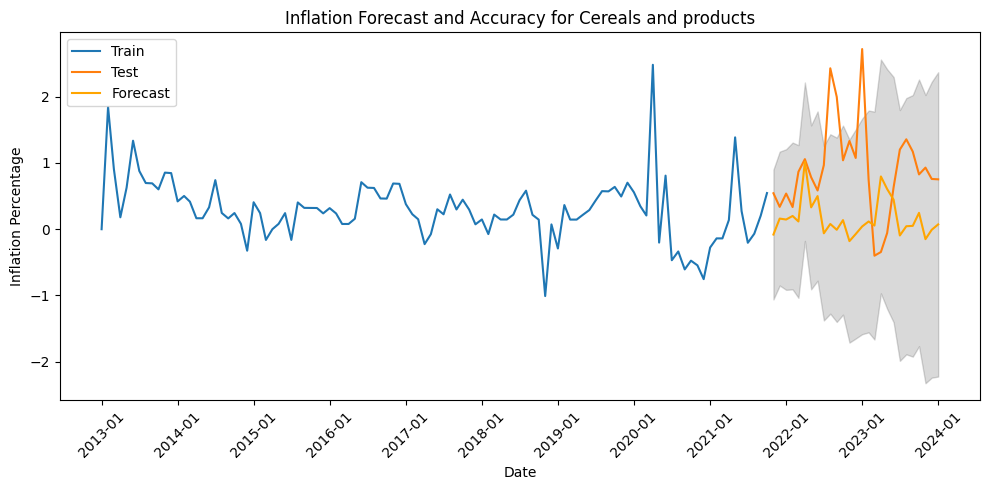

Forecasting and evaluating accuracy for Clothing
MAE: 0.3717965243169659, MSE: 0.22260460400466472, RMSE: 0.4718099235970612


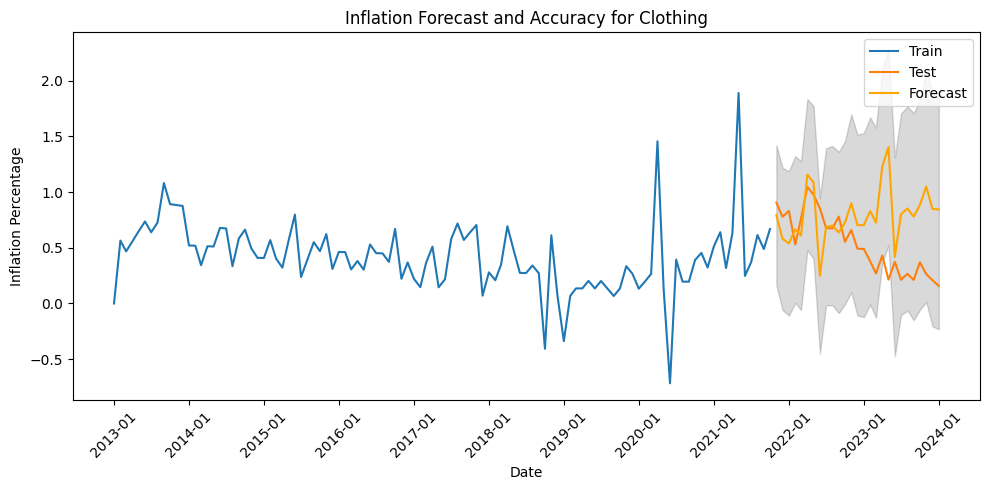

Forecasting and evaluating accuracy for Clothing and footwear
MAE: 0.41895835035709567, MSE: 0.28135425169637013, RMSE: 0.5304283662252333


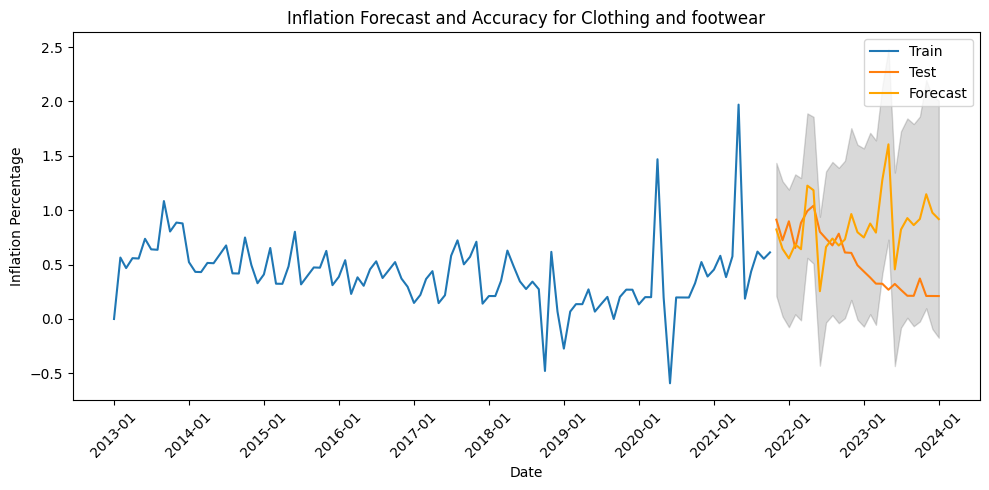

Forecasting and evaluating accuracy for Consumer Food Price Index
MAE: 1.066919664784744, MSE: 2.228845266828942, RMSE: 1.4929317689797286


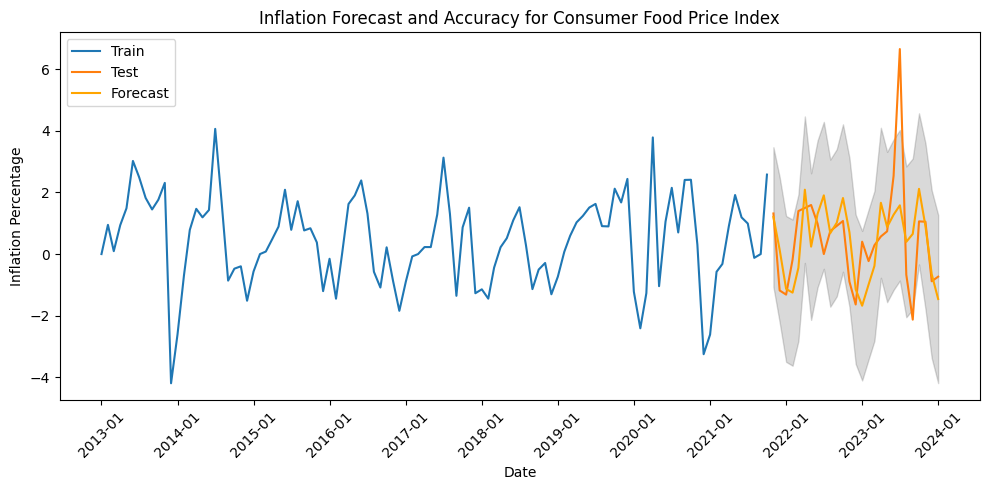

Forecasting and evaluating accuracy for Education
MAE: 0.3174776378643881, MSE: 0.2531308552388283, RMSE: 0.503121113886933


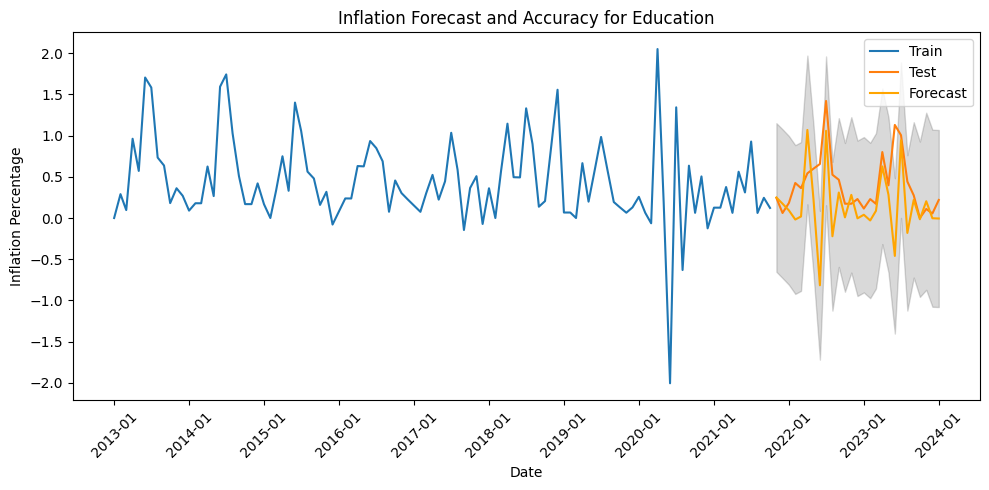

Forecasting and evaluating accuracy for Egg
MAE: 1.7690973844135887, MSE: 4.309335250288144, RMSE: 2.07589384369436


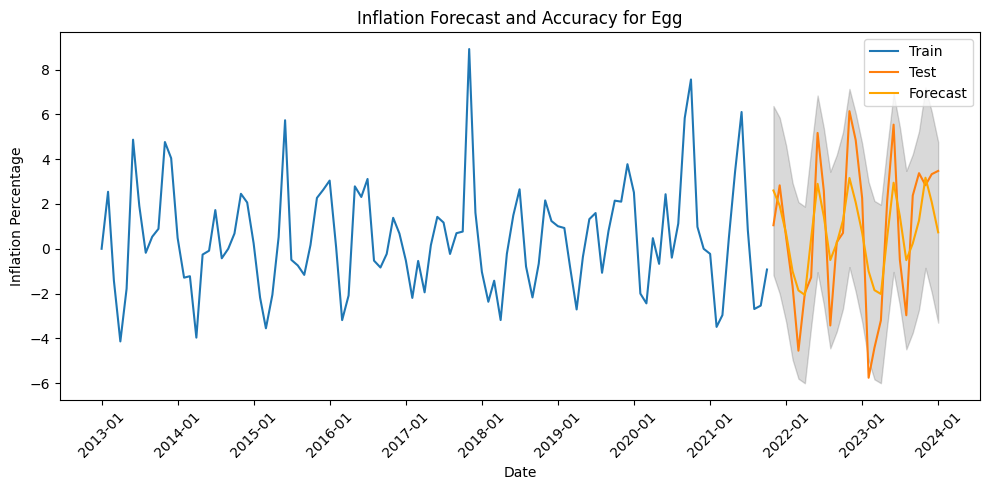

Forecasting and evaluating accuracy for Food and beverages
MAE: 0.8943062356534777, MSE: 1.6041117789226784, RMSE: 1.266535344521691


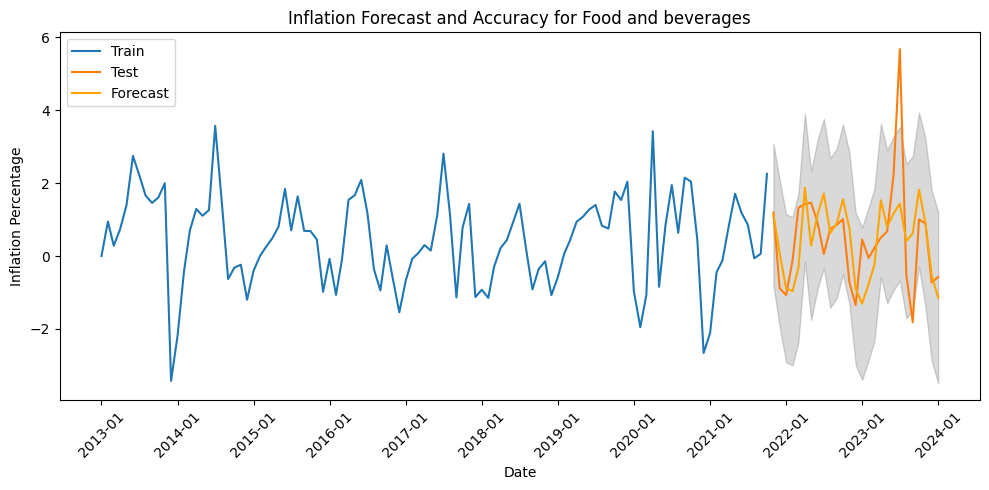

Forecasting and evaluating accuracy for Footwear
MAE: 0.5064851989520824, MSE: 0.3680998536368308, RMSE: 0.6067123318648062


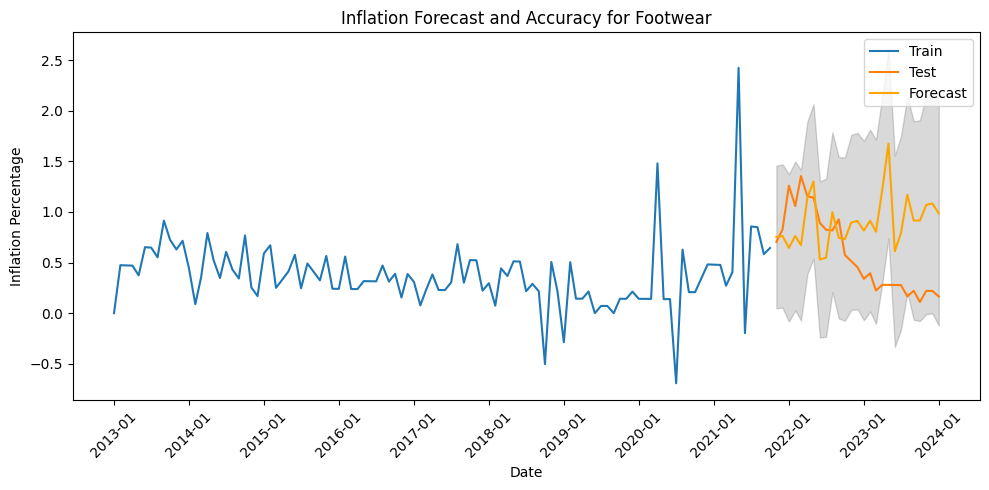

Forecasting and evaluating accuracy for Fruits
MAE: 1.2906221586399638, MSE: 3.0165315605650282, RMSE: 1.7368165016964308


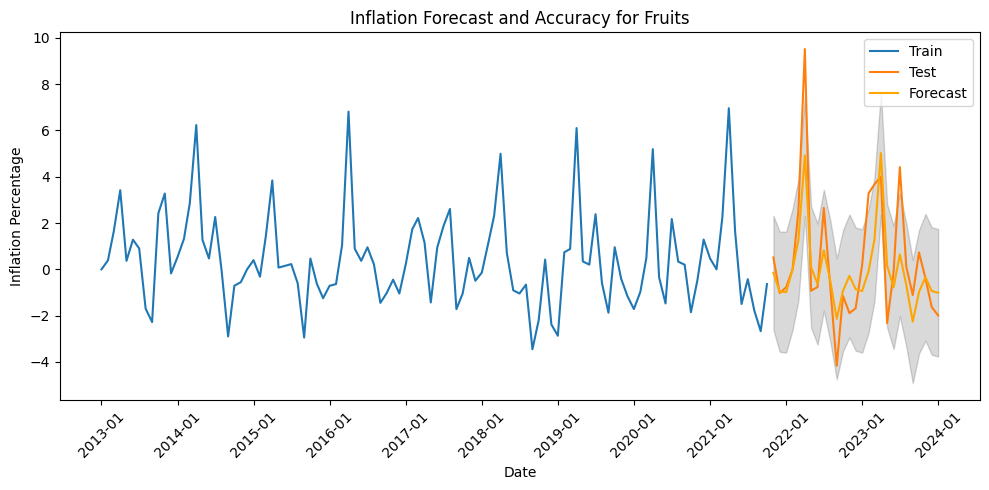

Forecasting and evaluating accuracy for Fuel and light
MAE: 0.8283457443806306, MSE: 1.5896835835341852, RMSE: 1.2608265477591218


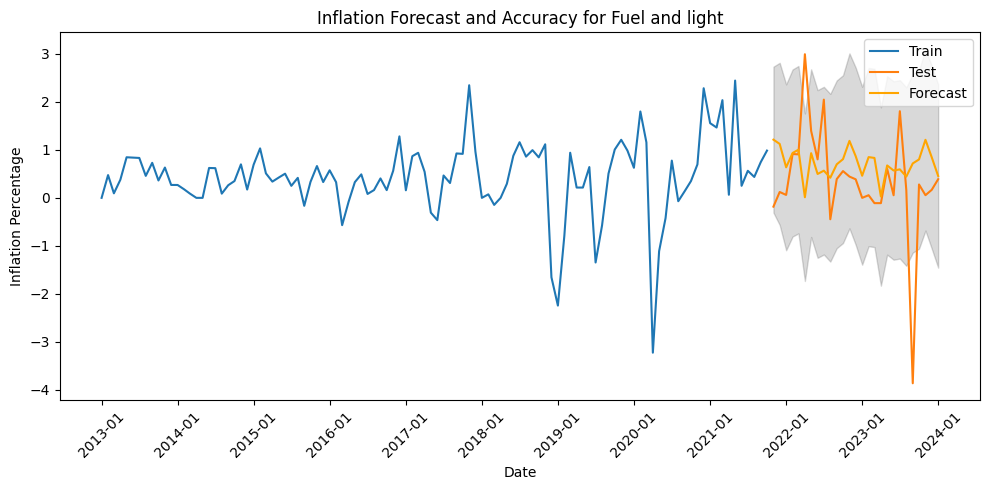

Forecasting and evaluating accuracy for General Index (All Groups)
MAE: 0.5051324545202163, MSE: 0.44817985119145193, RMSE: 0.6694623598018428


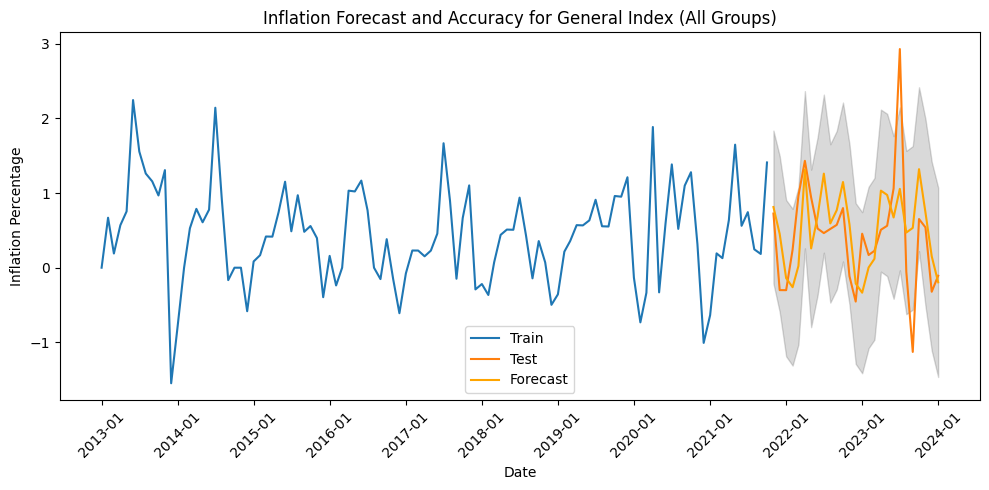

Forecasting and evaluating accuracy for Health
MAE: 0.17273643108961045, MSE: 0.04789440140595414, RMSE: 0.2188478955940727


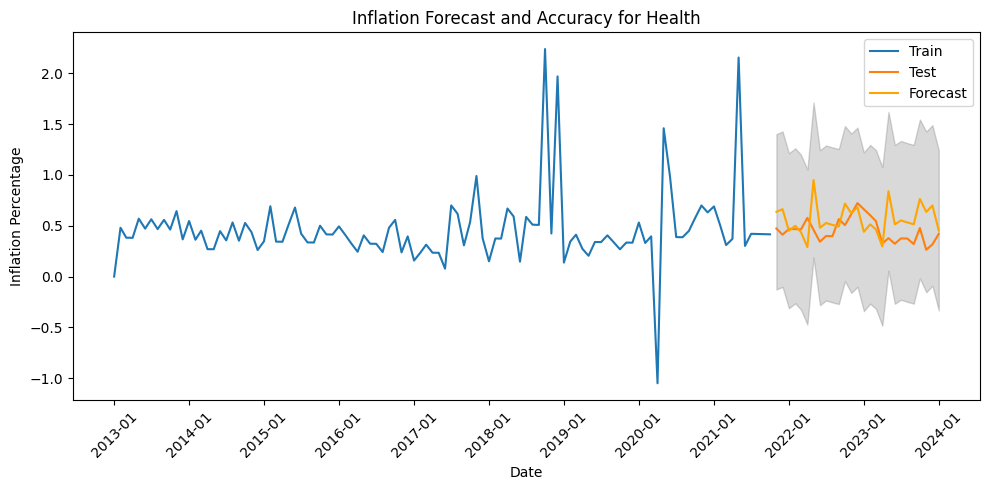

Forecasting and evaluating accuracy for Household goods and services
MAE: 0.2894572358703849, MSE: 0.14933076668218156, RMSE: 0.38643339229701873


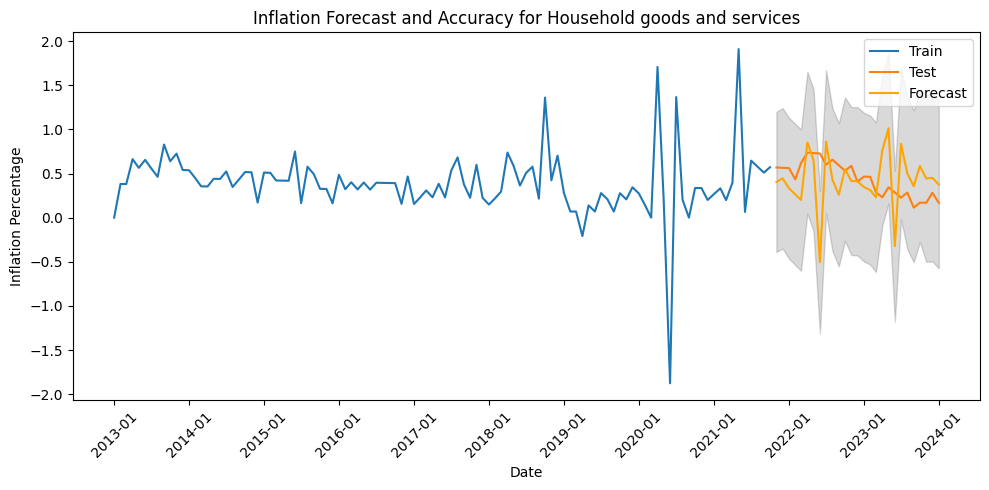

Forecasting and evaluating accuracy for Housing
MAE: 0.16570198336163552, MSE: 0.04062959243098354, RMSE: 0.20156783580468274


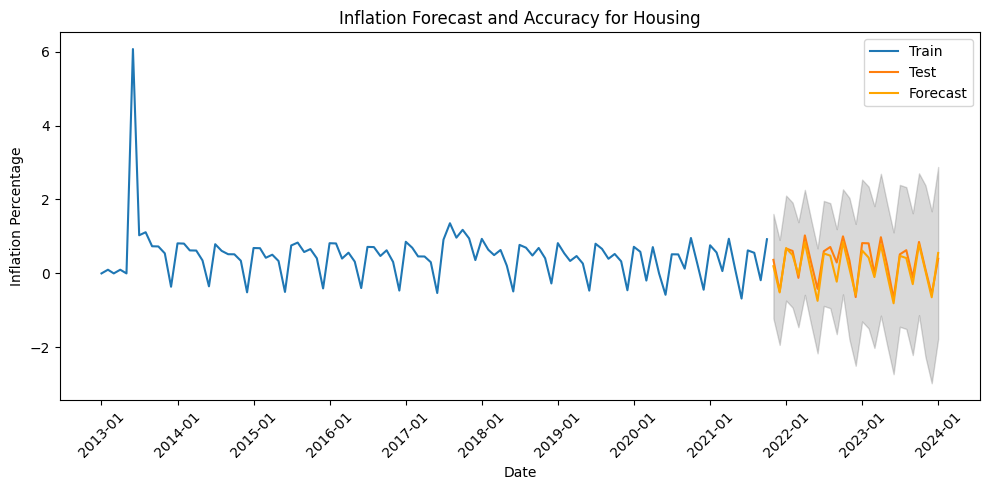

Forecasting and evaluating accuracy for Meat and fish
MAE: 1.7788717355103558, MSE: 4.513644416871257, RMSE: 2.1245339293292673


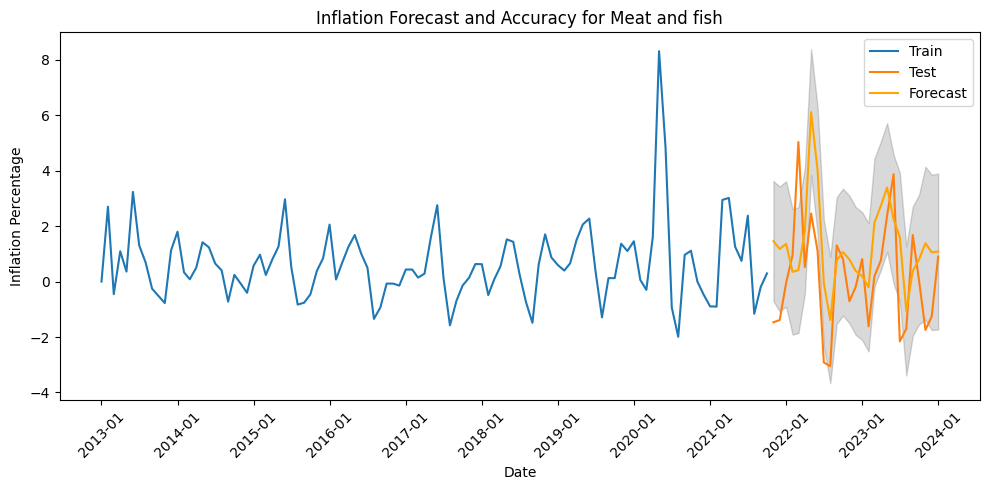

Forecasting and evaluating accuracy for Milk and products
MAE: 0.35480530641028135, MSE: 0.1739316133381624, RMSE: 0.4170510919997242


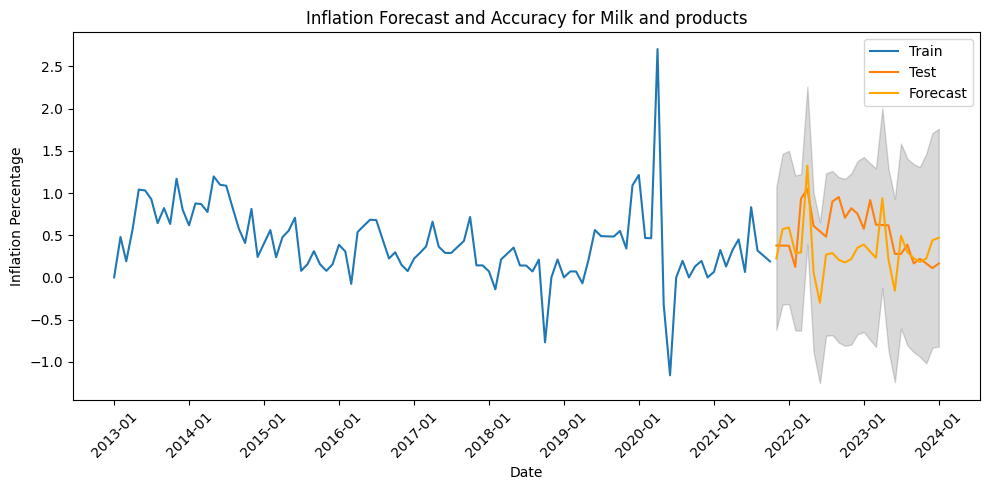

Forecasting and evaluating accuracy for Miscellaneous
MAE: 0.21845013659539098, MSE: 0.08107851512769618, RMSE: 0.2847428930240335


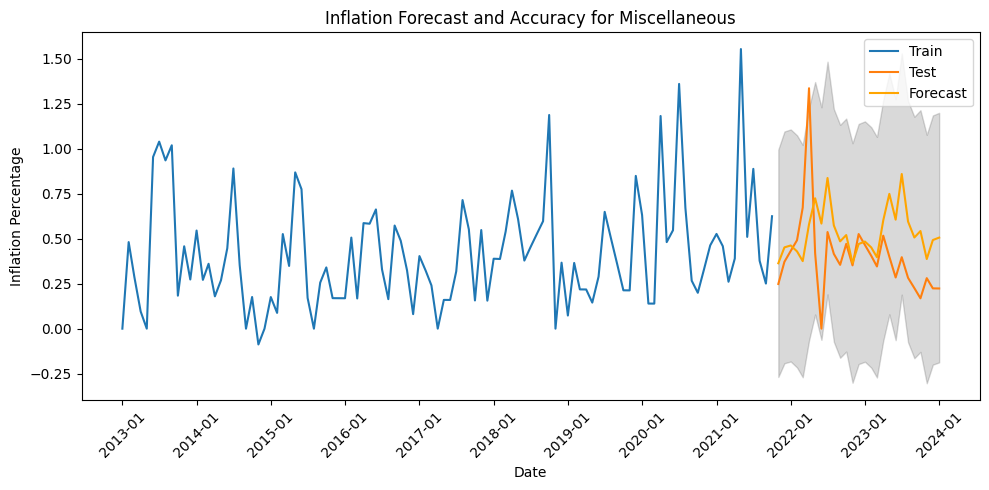

Forecasting and evaluating accuracy for Non-alcoholic beverages
MAE: 0.19284589424983511, MSE: 0.049883875682772805, RMSE: 0.22334698494220334


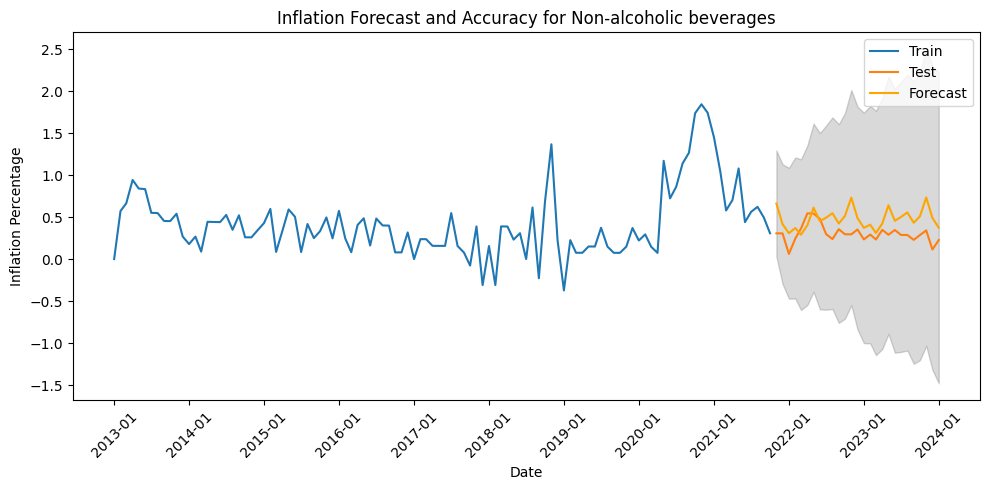

Forecasting and evaluating accuracy for Oils and fats
MAE: 4.013463483577296, MSE: 18.410609227194065, RMSE: 4.290758584119371


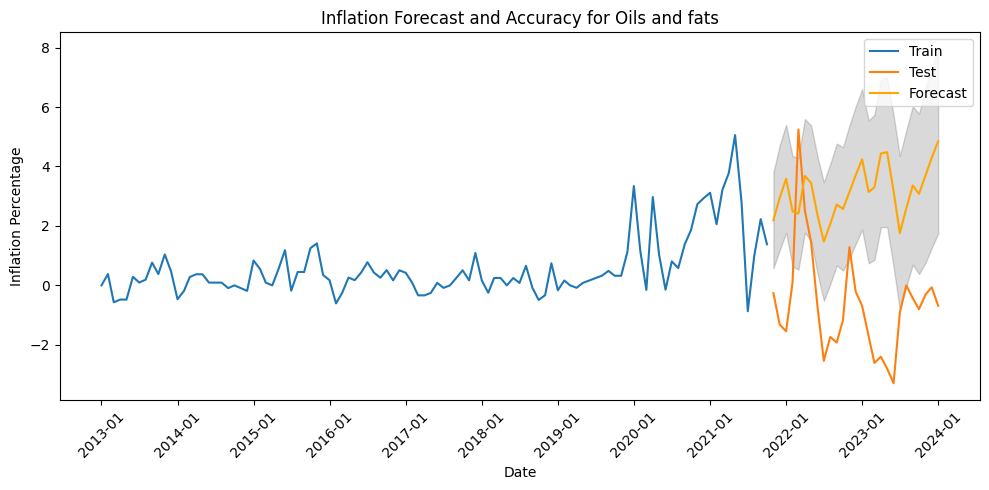

Forecasting and evaluating accuracy for Pan; tobacco; and intoxicants
MAE: 0.265926260062562, MSE: 0.12348776663009348, RMSE: 0.351408262040171


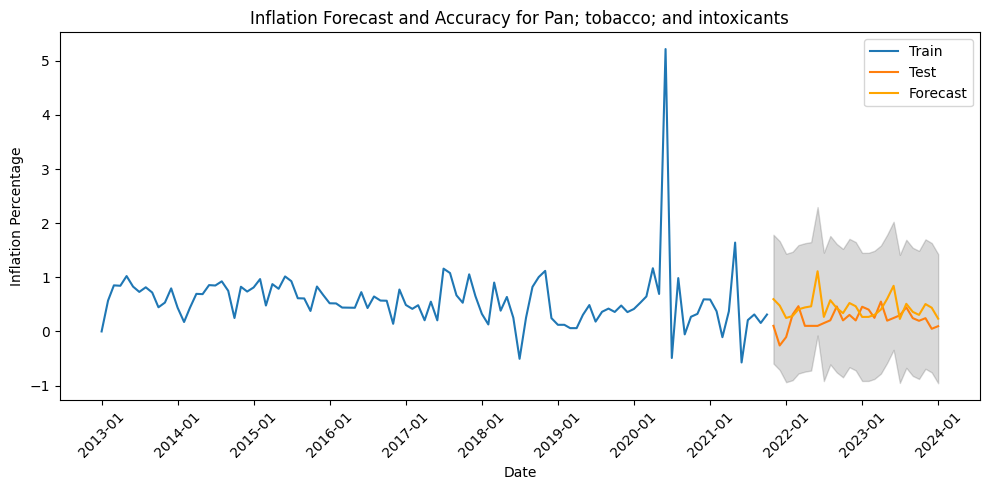

Forecasting and evaluating accuracy for Personal care and effects
MAE: 0.576578979196903, MSE: 0.4528633076225204, RMSE: 0.6729511926005632


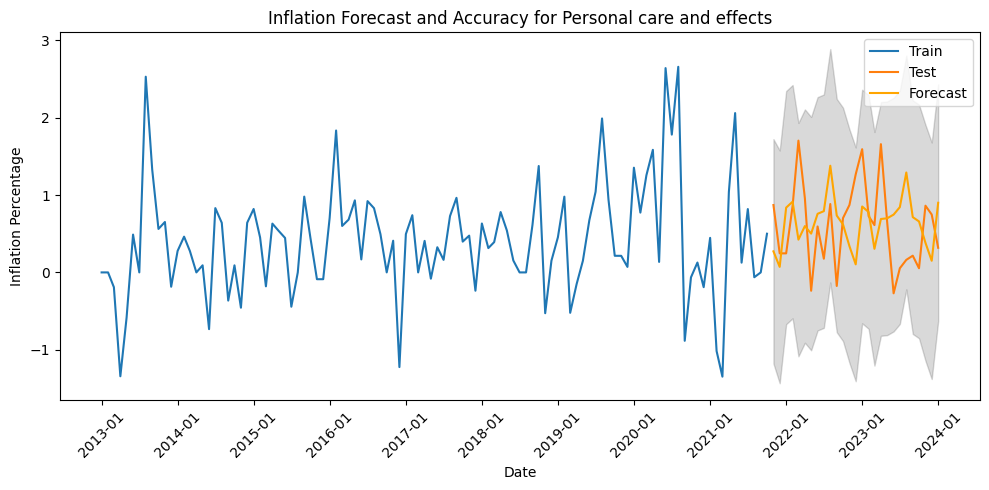

Forecasting and evaluating accuracy for Prepared meals; snacks; sweets etc.
MAE: 0.27015141436505496, MSE: 0.10950255223033822, RMSE: 0.3309116985395624


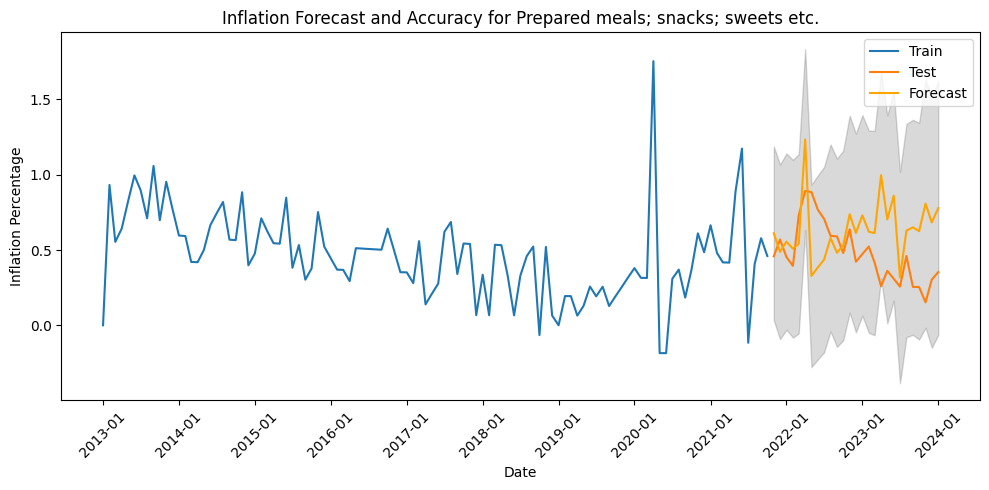

Forecasting and evaluating accuracy for Pulses and products
MAE: 1.0959645688318256, MSE: 2.0265689035524272, RMSE: 1.4235760968604478


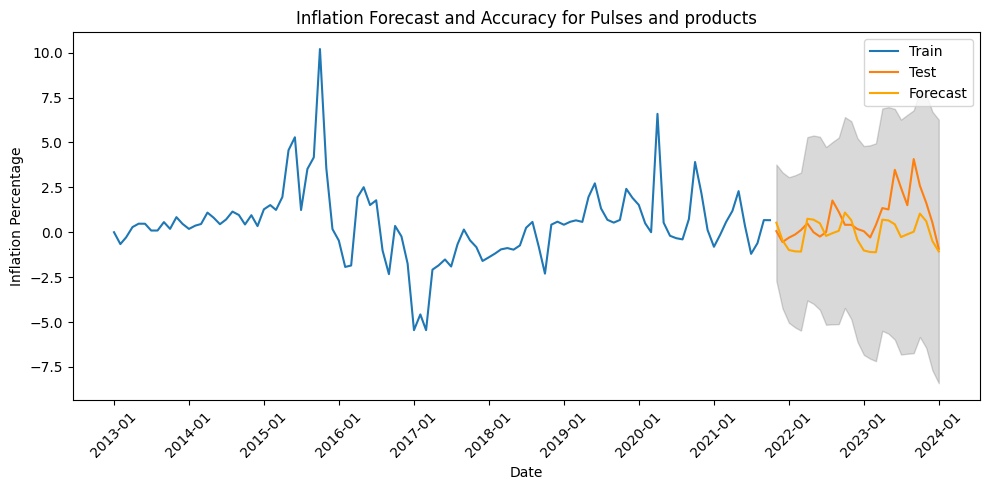

Forecasting and evaluating accuracy for Recreation and amusement
MAE: 0.3281020210053943, MSE: 0.1466214071902505, RMSE: 0.38291174856649474


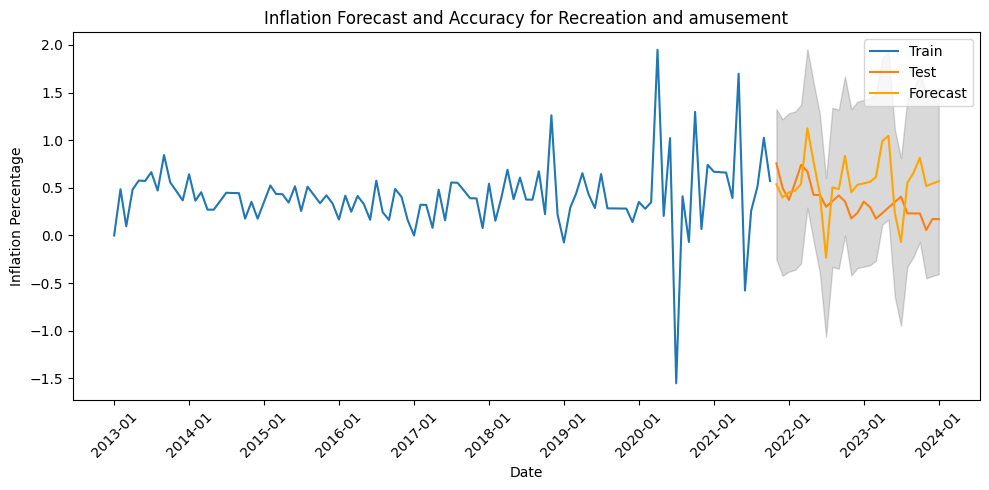

Forecasting and evaluating accuracy for Spices
MAE: 1.2206913971330733, MSE: 2.0928037469212106, RMSE: 1.4466526006340328


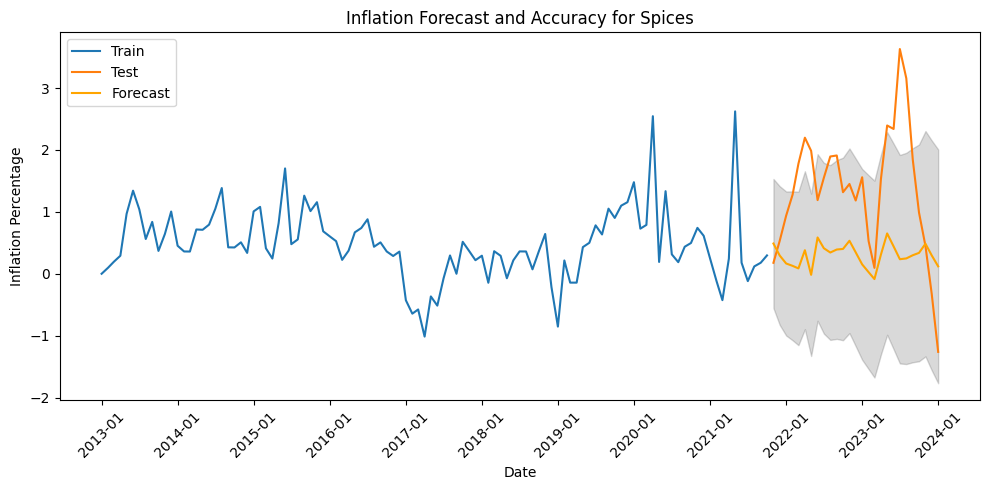

Forecasting and evaluating accuracy for Sugar and confectionery
MAE: 0.6937535774632863, MSE: 0.7330245088198575, RMSE: 0.856168504921699


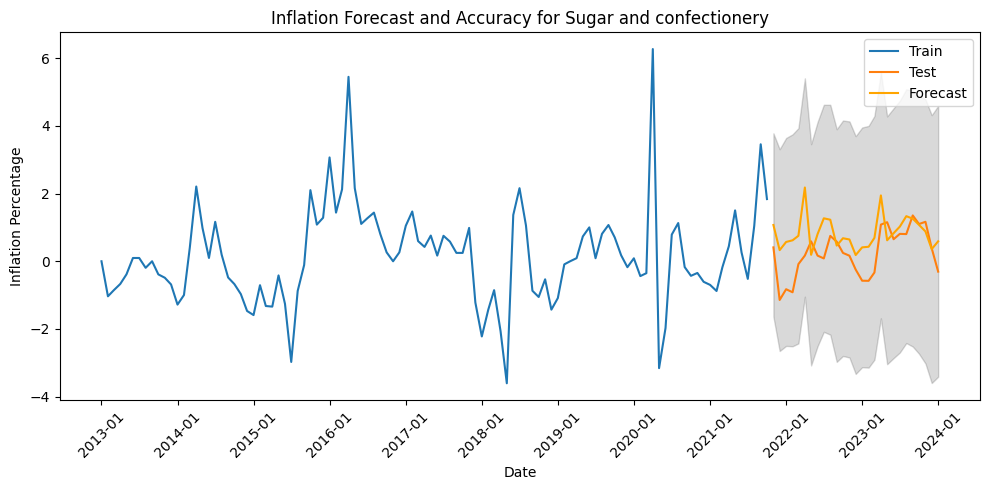

Forecasting and evaluating accuracy for Transport and communication
MAE: 0.7376038492471811, MSE: 0.8026926797491593, RMSE: 0.8959311802527911


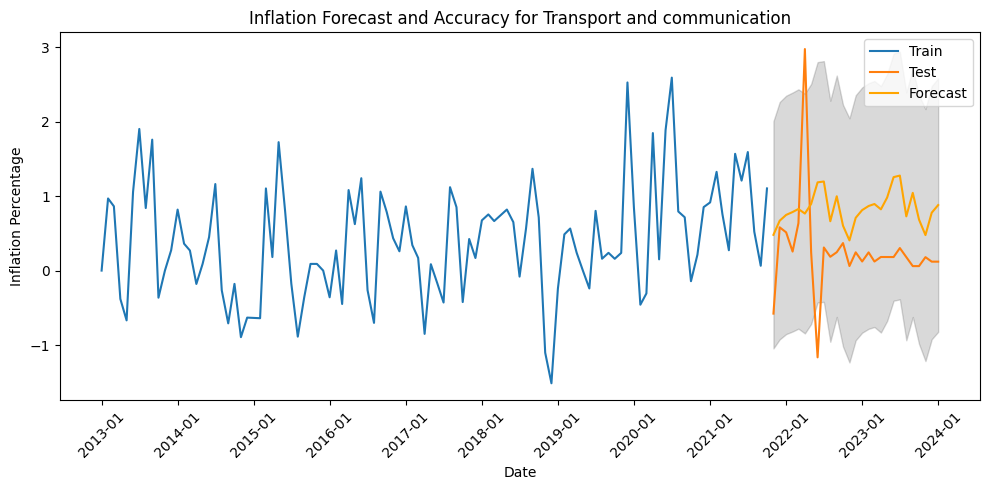

Forecasting and evaluating accuracy for Vegetables
MAE: 5.5203893035243485, MSE: 66.44914284613903, RMSE: 8.151634366563494


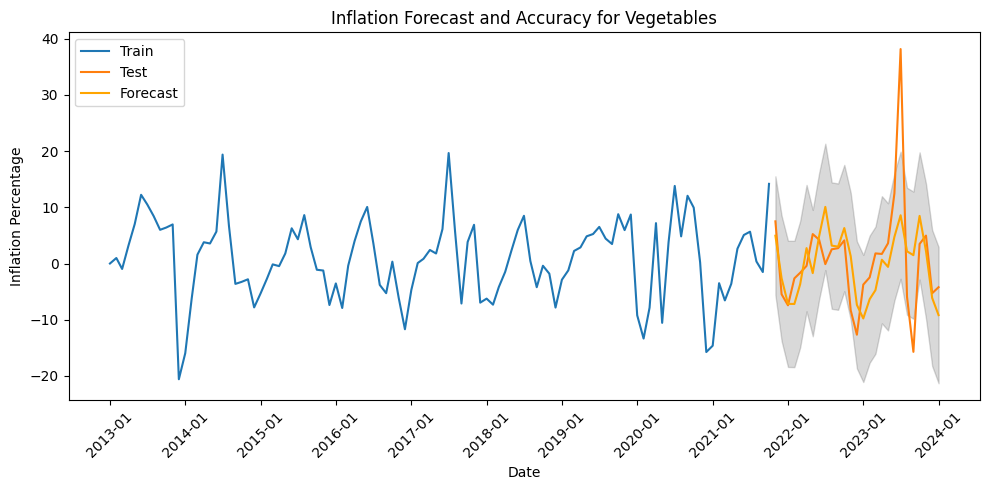

Cereals and products: MAE = 0.8958415384365802, MSE = 1.2273403085848822, RMSE = 1.1078539202371773
Clothing: MAE = 0.3717965243169659, MSE = 0.22260460400466472, RMSE = 0.4718099235970612
Clothing and footwear: MAE = 0.41895835035709567, MSE = 0.28135425169637013, RMSE = 0.5304283662252333
Consumer Food Price Index: MAE = 1.066919664784744, MSE = 2.228845266828942, RMSE = 1.4929317689797286
Education: MAE = 0.3174776378643881, MSE = 0.2531308552388283, RMSE = 0.503121113886933
Egg: MAE = 1.7690973844135887, MSE = 4.309335250288144, RMSE = 2.07589384369436
Food and beverages: MAE = 0.8943062356534777, MSE = 1.6041117789226784, RMSE = 1.266535344521691
Footwear: MAE = 0.5064851989520824, MSE = 0.3680998536368308, RMSE = 0.6067123318648062
Fruits: MAE = 1.2906221586399638, MSE = 3.0165315605650282, RMSE = 1.7368165016964308
Fuel and light: MAE = 0.8283457443806306, MSE = 1.5896835835341852, RMSE = 1.2608265477591218
General Index (All Groups): MAE = 0.5051324545202163, MSE = 0.4481798511

In [33]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

def train_and_forecast(dataframe, category, steps=12):
    # Split the data into train and test
    category_df = dataframe[dataframe['Description'] == category]
    train_size = int(len(category_df) * 0.8)  # 80% of data for training
    train, test = category_df.iloc[:train_size], category_df.iloc[train_size:]
    
    # Fit the SARIMAX model on the training data
    model = SARIMAX(train['combined_inf_percentage'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    
    # Forecast
    forecast = model_fit.get_forecast(steps=len(test))
    forecast_ci = forecast.conf_int()
    
    # Calculate accuracy metrics
    test['forecast'] = forecast.predicted_mean
    mae = mean_absolute_error(test['combined_inf_percentage'], test['forecast'])
    mse = mean_squared_error(test['combined_inf_percentage'], test['forecast'])
    rmse = np.sqrt(mse)
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
    
    # Plot the historical data and forecast with confidence intervals
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train['combined_inf_percentage'], label='Train')
    plt.plot(test.index, test['combined_inf_percentage'], label='Test')
    plt.plot(test.index, test['forecast'], label='Forecast', color='orange')
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.15)
    
    # Add title and labels
    plt.title(f'Inflation Forecast and Accuracy for {category}')
    plt.xlabel('Date')
    plt.ylabel('Inflation Percentage')
    
    # Format the dates on x-axis
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=15))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.legend()
    plt.show()
    
    return mae, mse, rmse

# Run the forecasting and accuracy evaluation for each category
categories = df['Description'].unique()
accuracy_metrics = {}
for category in categories:
    print(f"Forecasting and evaluating accuracy for {category}")
    mae, mse, rmse = train_and_forecast(df, category)
    accuracy_metrics[category] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Display the accuracy metrics for each category
for category, metrics in accuracy_metrics.items():
    print(f"{category}: MAE = {metrics['MAE']}, MSE = {metrics['MSE']}, RMSE = {metrics['RMSE']}")


In [34]:
df

Description  Rural  Urban  Combined  \
year_month                                                 
2013-01-01  Cereals and products  107.5  110.5     108.4   
2013-02-01  Cereals and products  109.2  112.9     110.4   
2013-03-01  Cereals and products  110.2  113.9     111.4   
2013-04-01  Cereals and products  110.2  114.6     111.6   
2013-05-01  Cereals and products  110.9  115.4     112.3   
...                          ...    ...    ...       ...   
2023-09-01            Vegetables  184.5  225.5     198.4   
2023-10-01            Vegetables  190.5  234.1     205.3   
2023-11-01            Vegetables  199.9  246.0     215.5   
2023-12-01            Vegetables  188.4  234.6     204.1   
2024-01-01            Vegetables  179.8  226.0     195.5   

            combined_inf_percentage  rural_inf_percentage  \
year_month                                                  
2013-01-01                 0.000000              0.000000   
2013-02-01                 1.845018              1.581395   
2013-03-01                 0.905797              0.915751   
2013-04-01                 0.179533              0.000000   
2013-05-01                 0.627240              0.635209   
...                             ...                   ...   
2023-09-01               -15.717927            -14.741220   
2023-10-01                 3.477823              3.252033   
2023-11-01                 4.968339              4.934383   
2023-12-01                -5.290023             -5.752876   
2024-01-01                -4.213621             -4.564756   

            urban_inf_percentage  
year_month                        
2013-01-01              0.000000  
2013-02-01              2.171946  
2013-03-01              0.885740  
2013-04-01              0.614574  
2013-05-01              0.698080  
...                          ...  
2023-09-01            -17.186926  
2023-10-01              3.813747  
2023-11-01              5.083298  
2023-12-01             -4.634146  
2024-01-01             -3.665814  

[3724 rows x 7 columns]

In [35]:
df.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01'],
              dtype='datetime64[ns]', name='year_month', length=3724, freq=None)

In [36]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import itertools

# # Assuming you have a time series dataframe, df, with a datetime index and 'combined_inf_percentage' as values
# # and a 'Description' column to filter the dataframe by category.

# # Define the p, d, and q parameters to take any value between 0 and 2
# p = d = q = range(0, 3)
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# # Assume you want to find the best parameters for 'Cereals and products' category
# category_df = df[df['Description'] == 'Clothing and footwear']['combined_inf_percentage']

# # Define a function to perform grid search
# def find_best_sarimax_parameters(time_series):
#     best_aic = np.inf
#     best_params = None
#     best_seasonal_params = None
    
#     for param in list(itertools.product(p, d, q)):
#         for seasonal_param in seasonal_pdq:
#             try:
#                 mod = SARIMAX(time_series,
#                               order=param,
#                               seasonal_order=seasonal_param,
#                               enforce_stationarity=False,
#                               enforce_invertibility=False)
                
#                 results = mod.fit(disp=False)
                
#                 if results.aic < best_aic:
#                     best_aic = results.aic
#                     best_params = param
#                     best_seasonal_params = seasonal_param
                    
#             except Exception as e:
#                 continue
    
#     return best_aic, best_params, best_seasonal_params

# # Run the grid search function
# best_aic, best_params, best_seasonal_params = find_best_sarimax_parameters(category_df)

# print(f"Best SARIMAX parameters for AIC: {best_aic}")
# print(f"SARIMAX non-seasonal parameters: {best_params}")
# print(f"SARIMAX seasonal parameters: {best_seasonal_params}")


In [37]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_squared_error

# # Assuming 'models' is a dictionary containing pre-trained SARIMAX models for each category
# # and 'df' is your original DataFrame

# def test_model_on_full_data(dataframe, category, model):
#     # Split the dataset
#     train_size = int(len(dataframe) * 0.8)
#     train, test = dataframe.iloc[:train_size], dataframe.iloc[train_size:]
    
#     # Get the predictions for the training set (in-sample prediction)
#     in_sample_preds = model.get_prediction(start=train.index[0], end=train.index[-1])
#     in_sample_preds = in_sample_preds.predicted_mean
    
#     # Get the out-of-sample forecast for the test set
#     out_of_sample_forecast = model.get_prediction(start = test.index[0], end=test.index[-1])
#     out_of_sample_forecast = out_of_sample_forecast.predicted_mean
    
#     # Combine the in-sample predictions with out-of-sample forecasts
#     full_predictions = pd.concat([in_sample_preds, out_of_sample_forecast])

#     # Calculate the RMSE for the entire dataset
#     rmse = np.sqrt(mean_squared_error(dataframe, full_predictions))
    
#     # Plot the observed data and the full forecast
#     plt.figure(figsize=(10, 5))
#     plt.plot(dataframe.index, dataframe, label='Observed', color='blue')
#     plt.plot(full_predictions.index, full_predictions, label='Forecast', color='orange')
    
#     plt.title(f'Forecast vs Observed for {category} (Full Data)')
#     plt.xlabel('Date')
#     plt.ylabel('Inflation Percentage')
#     plt.legend()
#     plt.show()
    
#     return rmse

# # Testing the models on the full data
# rmse_values = {}
# for category in models:
#     print(f"Testing {category} model on full data")
#     category_df = df[df['Description'] == category]['combined_inf_percentage']
#     rmse_values[category] = test_model_on_full_data(category_df, category, models[category])
#     print(f"RMSE for {category}: {rmse_values[category]}")


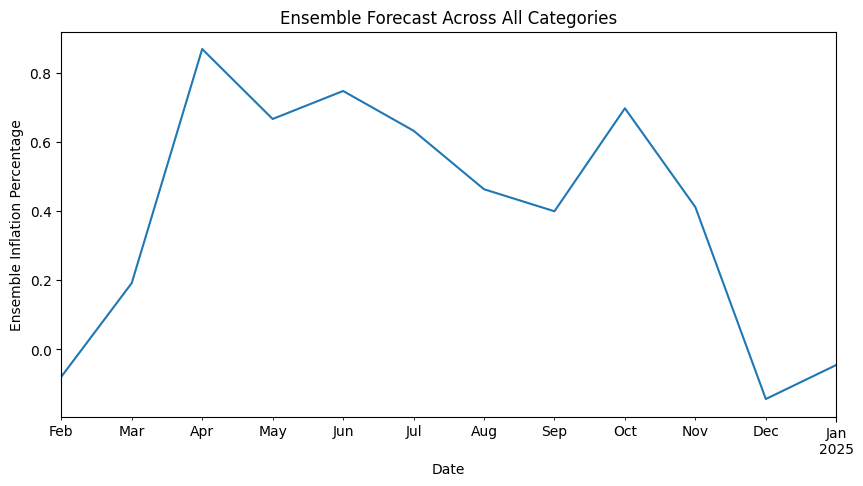

In [38]:
def ensemble_forecast(models, dataframe, steps=12):
    # Dictionary to store forecasts
    forecast_dict = {}

    # Forecast using each model and store the results
    for category, model in models.items():
        forecast = model.get_forecast(steps=steps)
        forecast_dict[category] = forecast.predicted_mean

    # Convert forecasts to a DataFrame
    forecast_df = pd.DataFrame(forecast_dict)

    # Calculate the mean forecast across all categories
    forecast_df['ensemble_mean'] = forecast_df.mean(axis=1)

    # Optionally, calculate median or other statistical measures
    # forecast_df['ensemble_median'] = forecast_df.median(axis=1)

    return forecast_df['ensemble_mean']

# Assuming you have a models dictionary with all 28 trained SARIMAX models
ensemble_pred = ensemble_forecast(models, df, steps=12)

# Plot the ensemble forecast
ensemble_pred.plot(figsize=(10, 5))
plt.title('Ensemble Forecast Across All Categories')
plt.xlabel('Date')
plt.ylabel('Ensemble Inflation Percentage')
plt.show()


In [39]:
from sklearn.ensemble import BaggingRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np
import pandas as pd

# A wrapper for SARIMAX to use with sklearn's BaggingRegressor
class SARIMAXWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, order, seasonal_order):
        self.order = order
        self.seasonal_order = seasonal_order
        self.model = None
    
    def fit(self, X, y):
        self.model = SARIMAX(y, order=self.order, seasonal_order=self.seasonal_order, 
                             enforce_stationarity=False, enforce_invertibility=False)
        self.model = self.model.fit(disp=False)
        return self
    
    def predict(self, X):
        forecast = self.model.get_forecast(steps=len(X))
        return forecast.predicted_mean

# Assume we have a DataFrame 'df' with a DateTime index and columns for each category
# For simplicity, let's assume we have a function 'get_category_data' that extracts the data for a single category
def get_category_data(dataframe, category_name, value_column='combined_inf_percentage'):
    # Filter the dataframe for the given category
    category_data = dataframe[dataframe['Description'] == category_name]
    
    # Return the time series data for the category
    return category_data[value_column]

# Train a separate bagging ensemble for each category
bagging_models = {}
for category in df['Description'].unique():
    # Prepare the data for the category
    y = get_category_data(df, category)
    
    # Instantiate and train the BaggingRegressor
    bagging_model = BaggingRegressor(base_estimator=SARIMAXWrapper(order=(1,1,1), seasonal_order=(1,1,1,12)),
                                     n_estimators=10,  # Number of models in the ensemble
                                     random_state=0)
    bagging_model.fit(np.arange(len(y)).reshape(-1, 1), y)  # X is just a placeholder here
    bagging_models[category] = bagging_model

# To make predictions with the ensemble, use the bagging_models dictionary
# Here's an example of making predictions for a single category
category = 'Cereals and products'
future_steps = 12
X_future = np.arange(len(df) + future_steps).reshape(-1, 1)[-future_steps:]  # Placeholder for future steps
ensemble_forecast = bagging_models[category].predict(X_future)


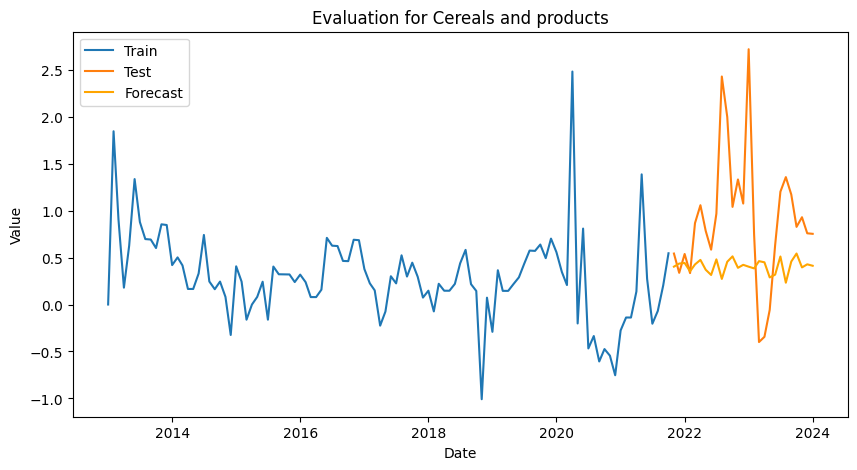

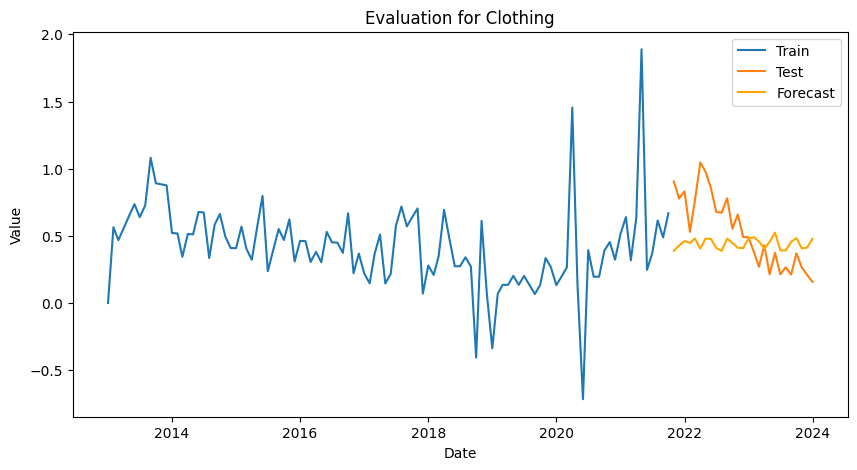

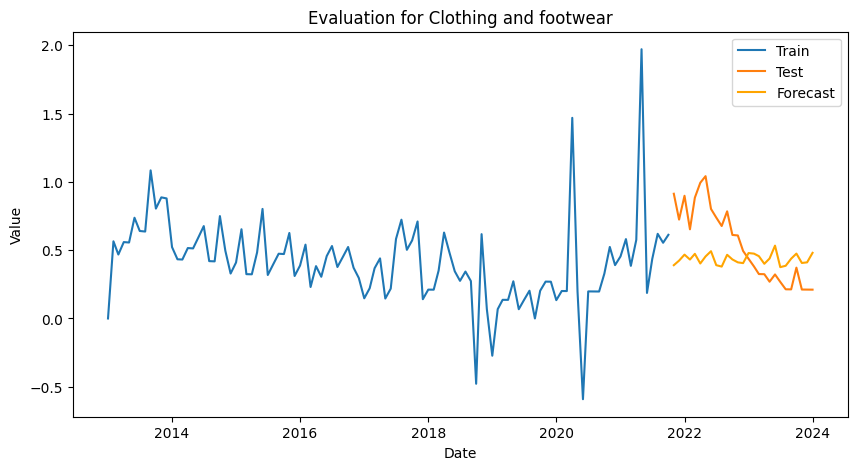

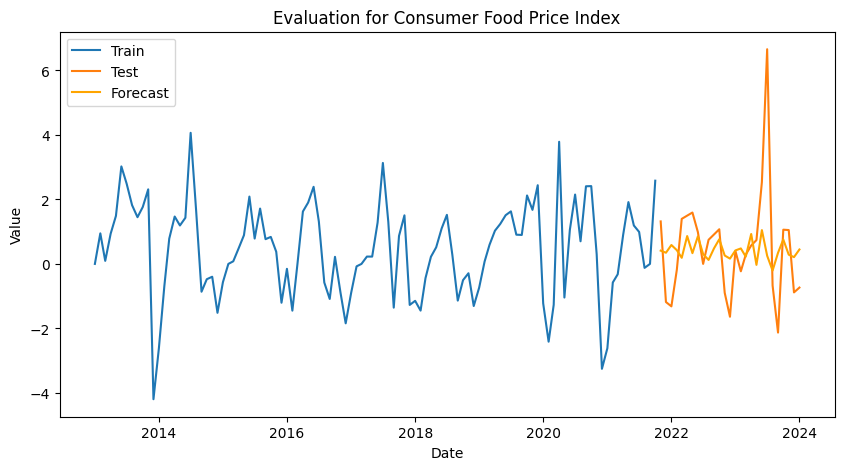

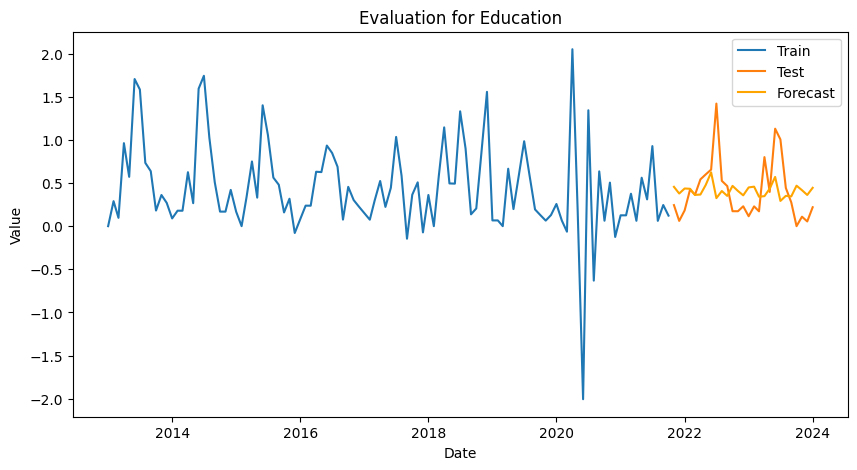

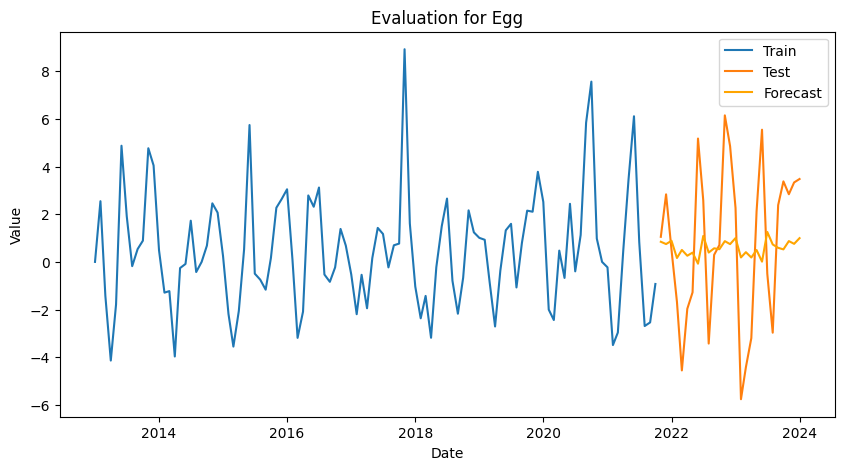

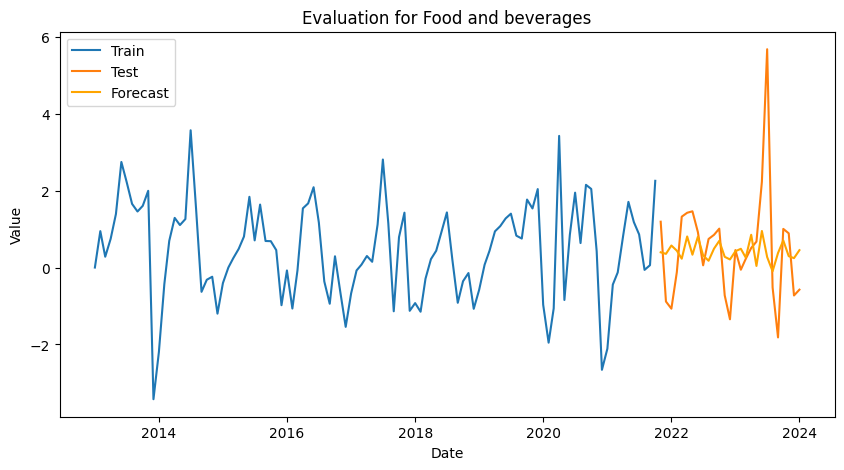

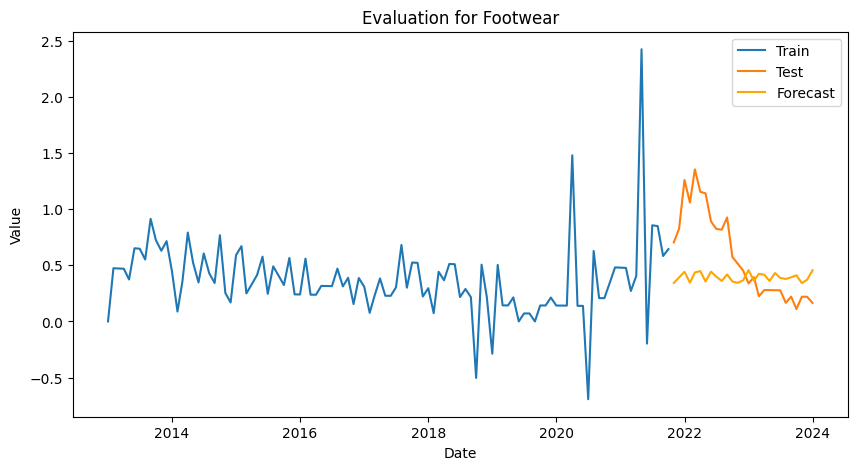

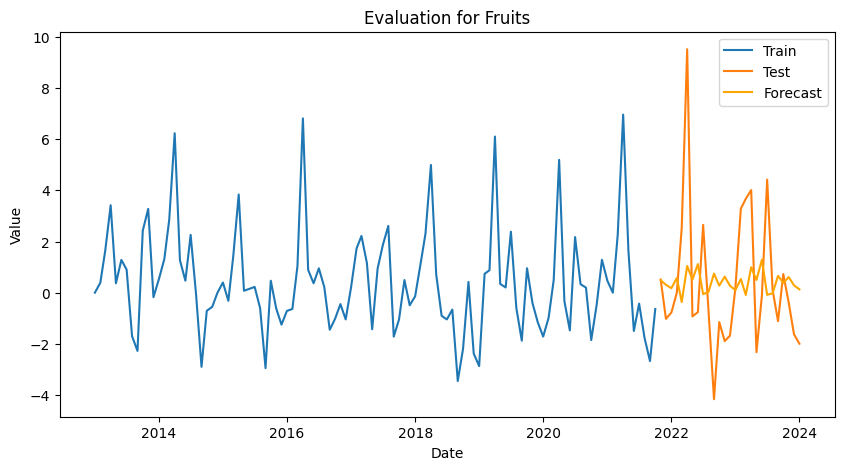

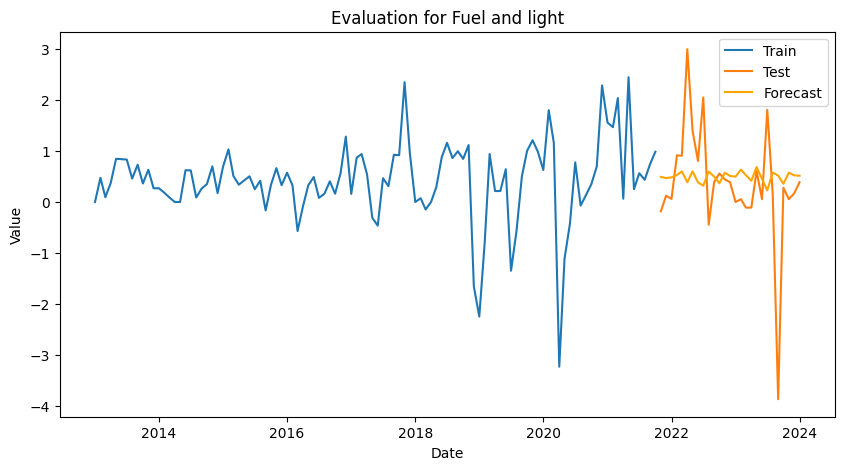

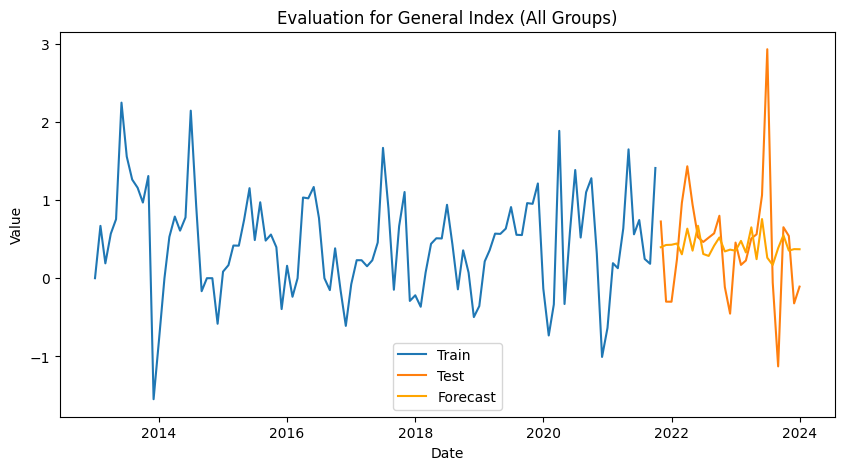

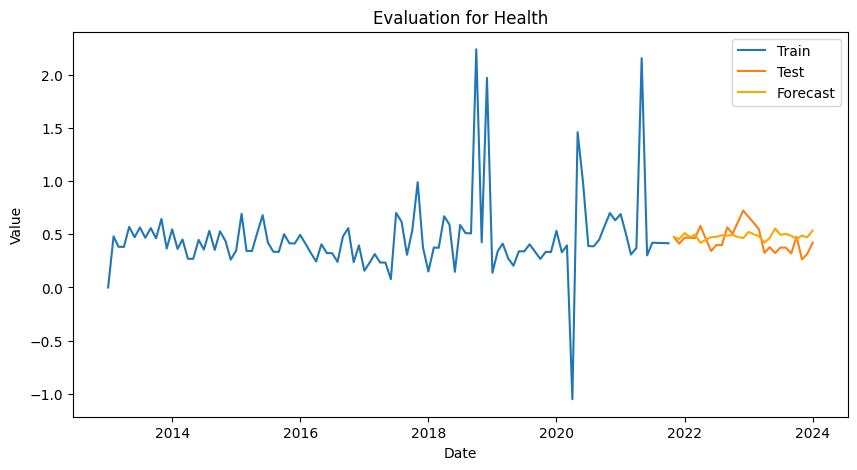

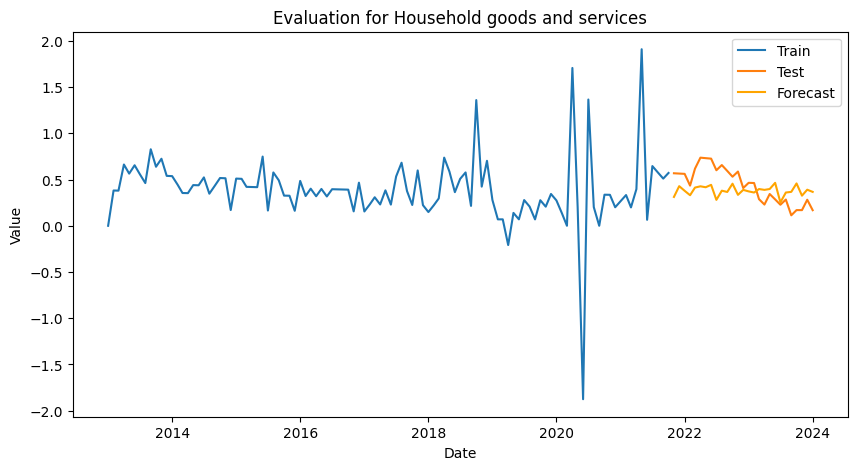

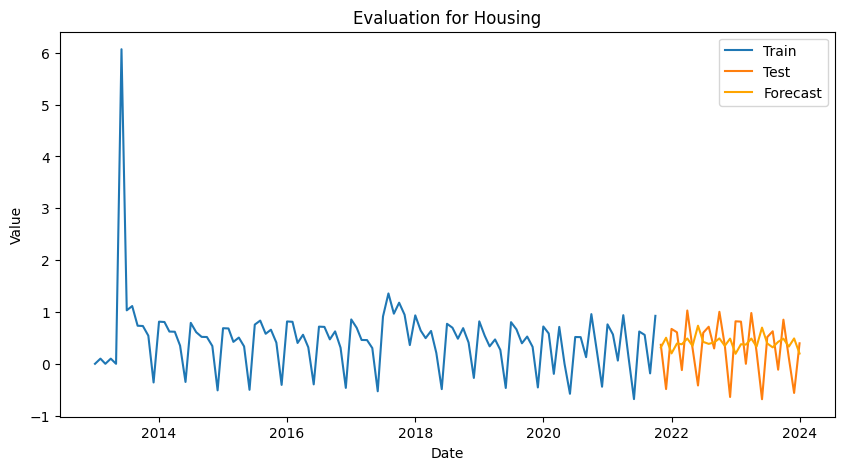

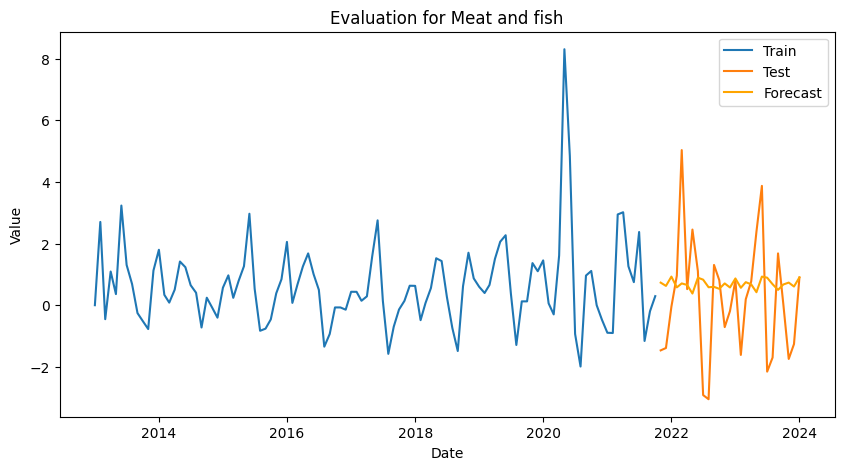

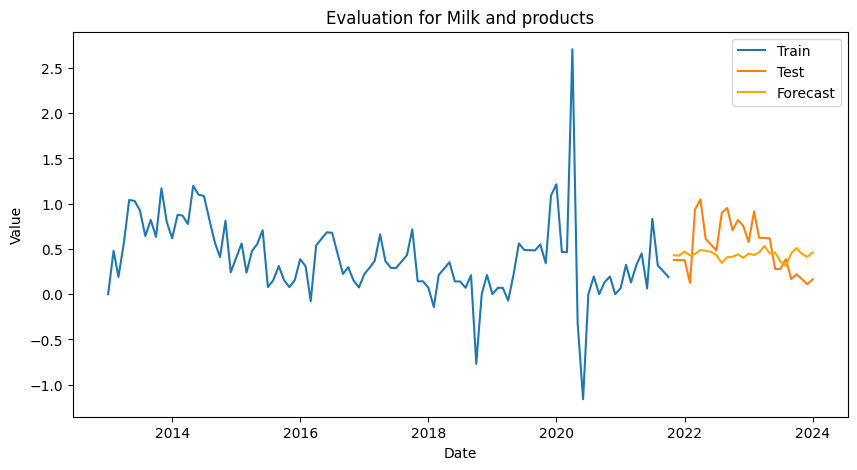

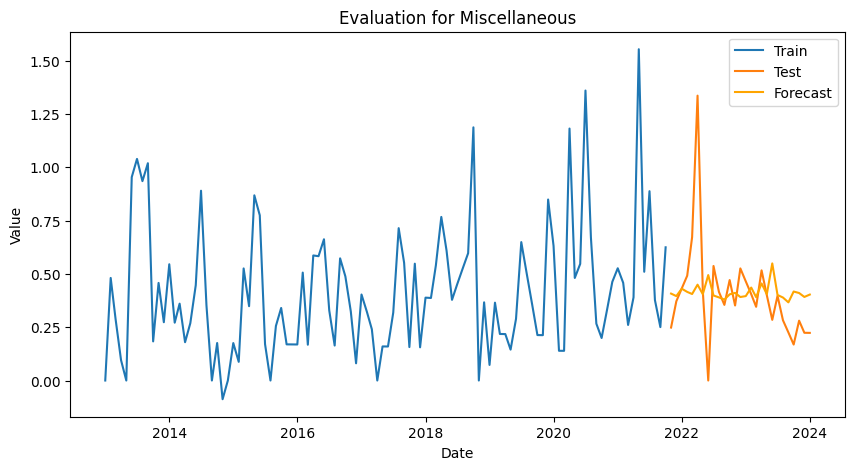

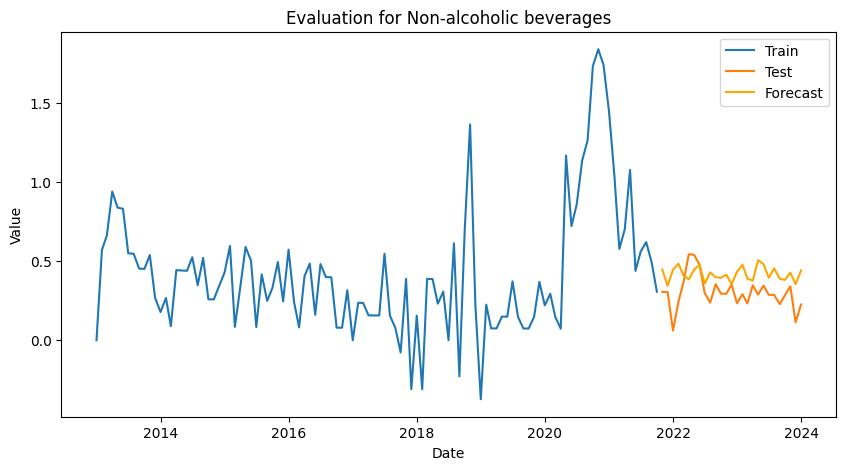

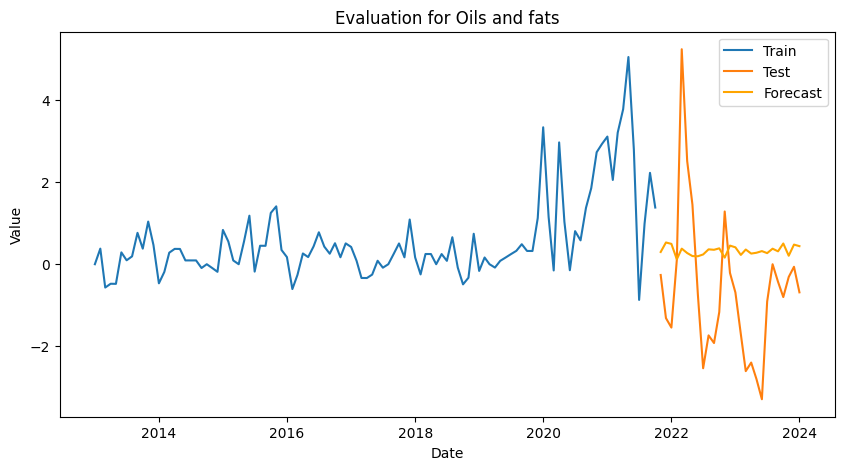

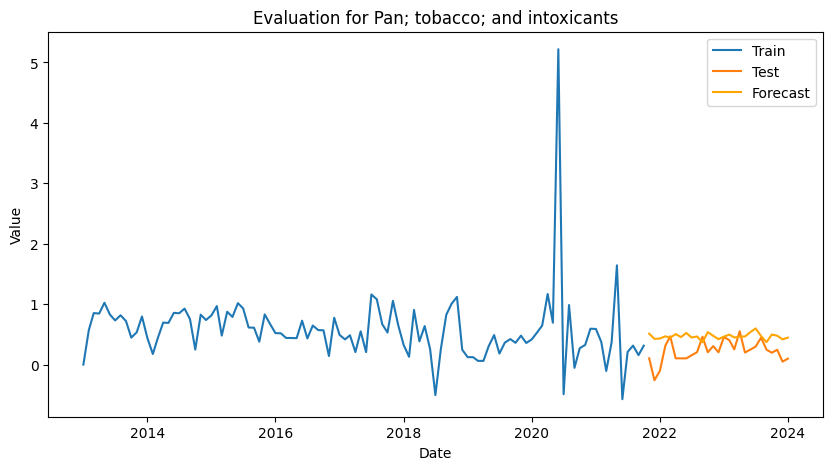

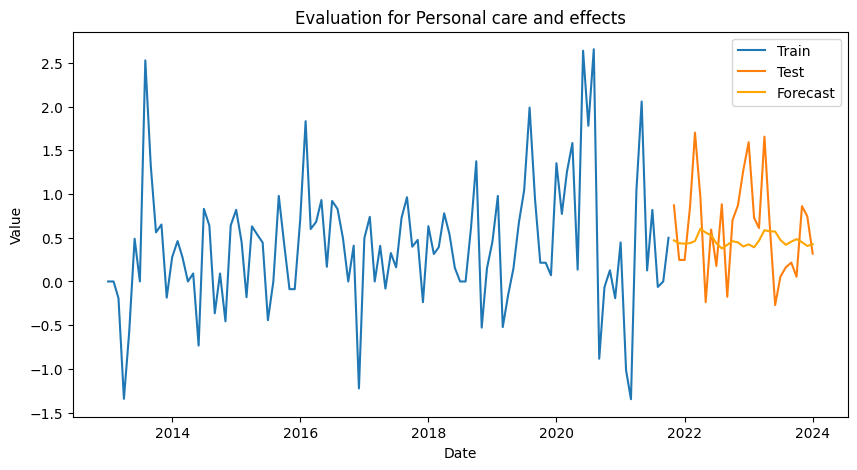

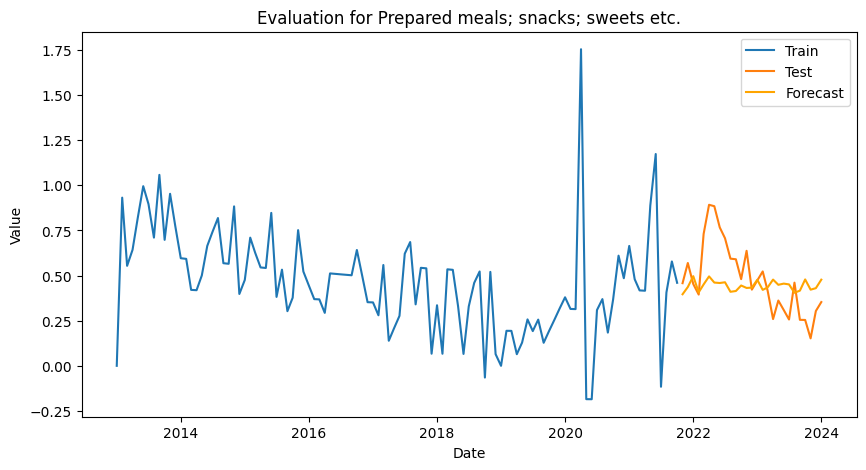

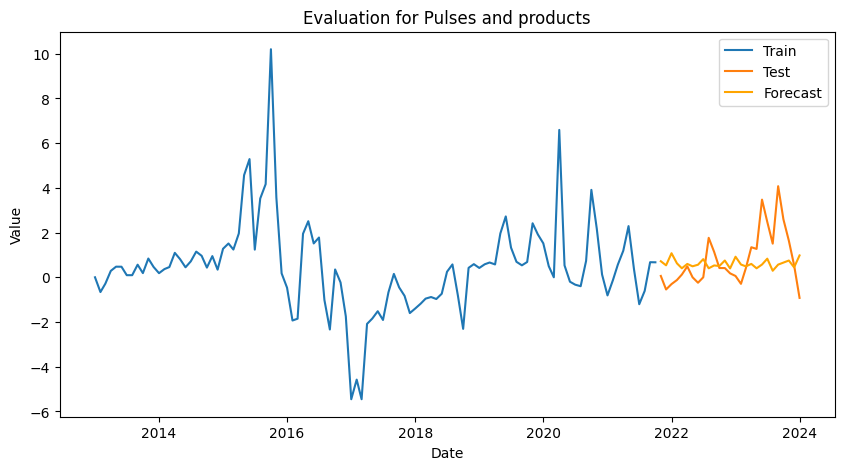

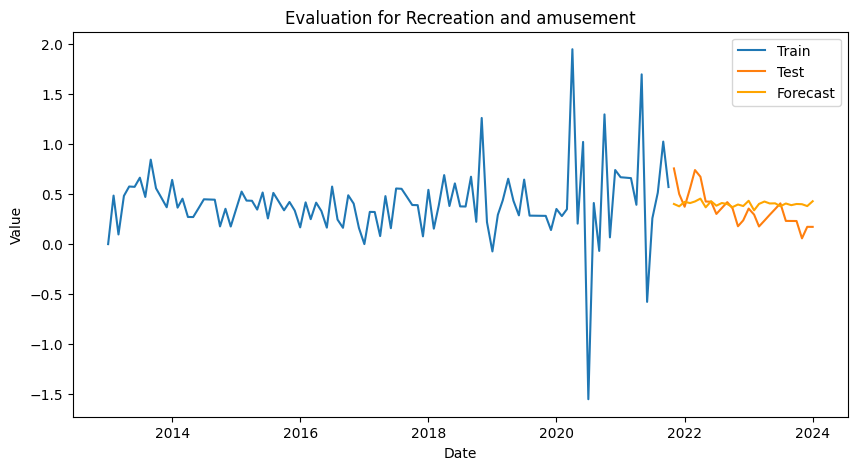

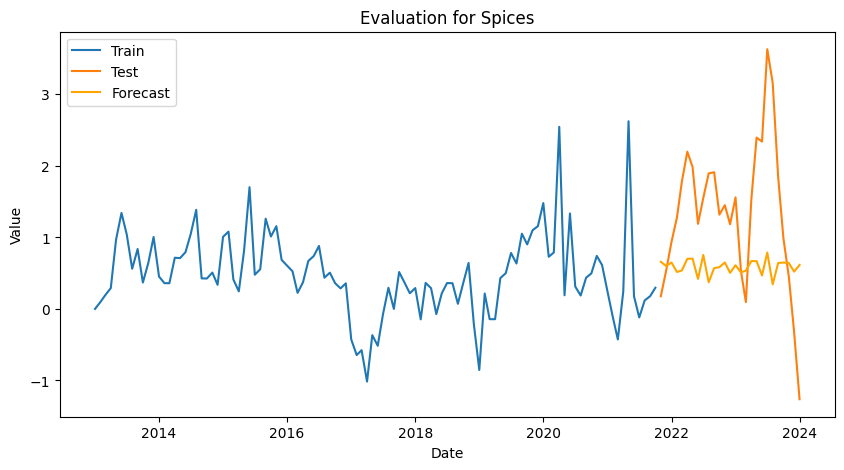

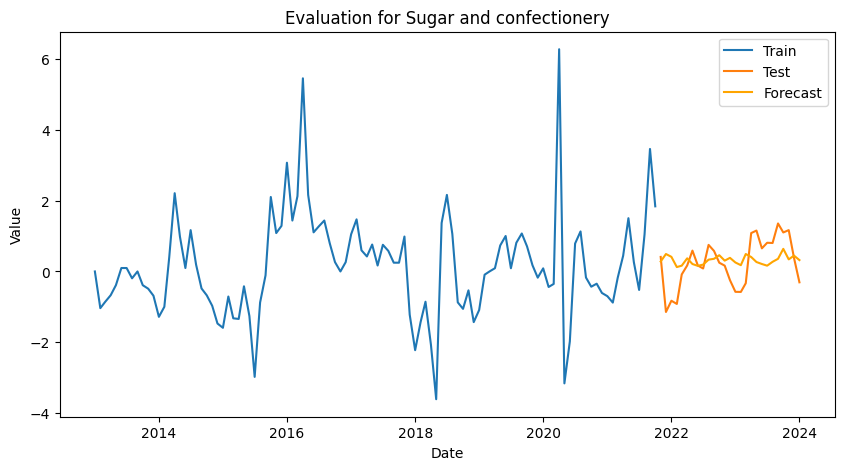

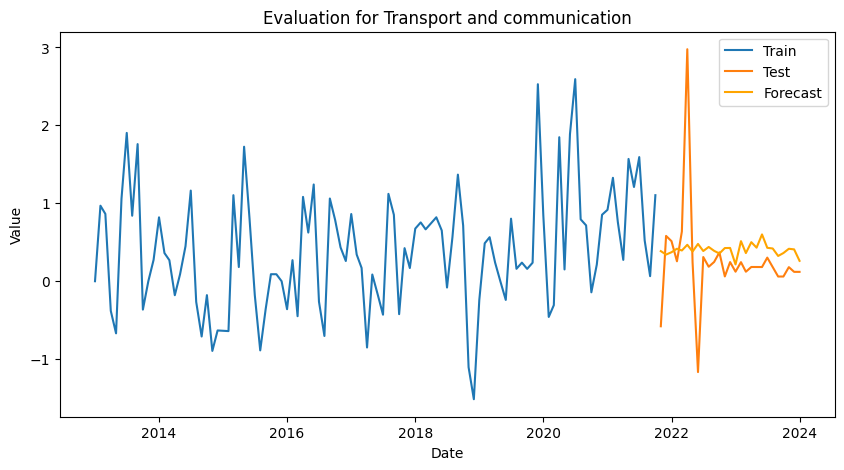

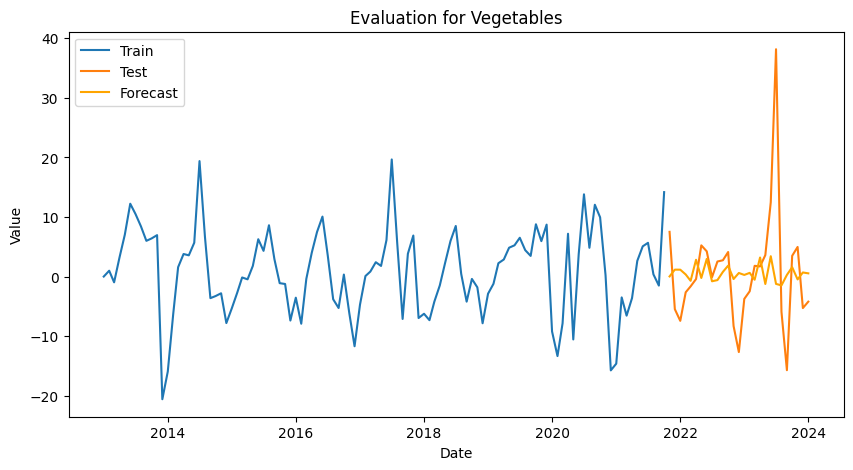

Cereals and products: MSE = 0.7255703837027908, RMSE = 0.8518041932878652
Clothing: MSE = 0.07970120652957392, RMSE = 0.2823140211352846
Clothing and footwear: MSE = 0.08544076720464065, RMSE = 0.2923025268529861
Consumer Food Price Index: MSE = 2.595068144864086, RMSE = 1.6109215203926248
Education: MSE = 0.1233946801272311, RMSE = 0.3512757892699568
Egg: MSE = 10.366889236052375, RMSE = 3.2197654007788166
Food and beverages: MSE = 1.8978843959373168, RMSE = 1.3776372512157606
Footwear: MSE = 0.17739257292658464, RMSE = 0.42117997688231174
Fruits: MSE = 7.649666137202759, RMSE = 2.76580298235481
Fuel and light: MSE = 1.3479612495078424, RMSE = 1.1610173338533074
General Index (All Groups): MSE = 0.5270650818103131, RMSE = 0.7259924805466742
Health: MSE = 0.015045424622737311, RMSE = 0.12265979220077503
Household goods and services: MSE = 0.039555788685375994, RMSE = 0.19888637129118725
Housing: MSE = 0.3488319338586052, RMSE = 0.5906199572132703
Meat and fish: MSE = 3.9829754741611088

In [40]:
from sklearn.metrics import mean_squared_error

# Assuming you have the original DataFrame `df`, the dictionary `bagging_models` containing your ensemble models, 
# and the `get_category_data` function

# Function to evaluate the ensemble model
def evaluate_ensemble_model(df, models, get_data_function, steps):
    # Dictionary to store evaluation metrics
    evaluation_results = {}
    
    # Iterate through each category model
    for category, model in models.items():
        # Get the time series data for the category
        full_series = get_data_function(df, category)
        
        # Split the data into train and test
        train_size = int(len(full_series) * 0.8)
        train, test = full_series.iloc[:train_size], full_series.iloc[train_size:]
        
        # Generate predictions for the test set
        # We reshape (-1, 1) because sklearn's models expect a 2D array for the input
        predictions = model.predict(np.arange(len(test)).reshape(-1, 1))
        
        # Calculate and store the evaluation metrics
        mse = mean_squared_error(test, predictions)
        rmse = np.sqrt(mse)
        evaluation_results[category] = {'MSE': mse, 'RMSE': rmse}
        
        # Optionally, you can plot the test vs predictions for each category
        plt.figure(figsize=(10, 5))
        plt.plot(train.index, train, label='Train')
        plt.plot(test.index, test, label='Test')
        plt.plot(test.index, predictions, label='Forecast', color='orange')
        plt.title(f'Evaluation for {category}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.show()
        
    return evaluation_results

# Evaluate the ensemble model
evaluation_metrics = evaluate_ensemble_model(df, bagging_models, get_category_data, steps=12)

# Print the evaluation results
for category, metrics in evaluation_metrics.items():
    print(f"{category}: MSE = {metrics['MSE']}, RMSE = {metrics['RMSE']}")


In [41]:
models

{'Cereals and products': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x17fe2d7d0>,
 'Clothing': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x28205a910>,
 'Clothing and footwear': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x282048290>,
 'Consumer Food Price Index': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x282024250>,
 'Education': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x28200bd10>,
 'Egg': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x282068bd0>,
 'Food and beverages': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x2820b1550>,
 'Footwear': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x2820dc6d0>,
 'Fruits': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x2820f6650>,
 'Fuel and light': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x17fecc050>,
 'General Index (All Groups)': <statsmodels.tsa.statespace.sarimax.S

In [42]:
# Assuming 'models' is a dictionary with your trained SARIMAX models

for category, model in models.items():
    # This will save the model in a binary format .pkl
    model.save(f"models/{category.replace(' ', '_')}_model.pkl")


In [43]:
df[df["Description"] == "Oils and fats"]

Description  Rural  Urban  Combined  combined_inf_percentage  \
year_month                                                                   
2013-01-01  Oils and fats  106.1  103.4     105.1                 0.000000   
2013-02-01  Oils and fats  106.7  103.5     105.5                 0.380590   
2013-03-01  Oils and fats  106.2  102.7     104.9                -0.568720   
2013-04-01  Oils and fats  105.7  102.1     104.4                -0.476644   
2013-05-01  Oils and fats  105.3  101.5     103.9                -0.478927   
...                   ...    ...    ...       ...                      ...   
2023-09-01  Oils and fats  164.5  158.3     162.2                -0.429711   
2023-10-01  Oils and fats  163.1  157.0     160.9                -0.801480   
2023-11-01  Oils and fats  162.6  156.7     160.4                -0.310752   
2023-12-01  Oils and fats  162.4  156.7     160.3                -0.062344   
2024-01-01  Oils and fats  161.2  155.8     159.2                -0.686213   

            rural_inf_percentage  urban_inf_percentage  
year_month                                              
2013-01-01              0.000000              0.000000  
2013-02-01              0.565504              0.096712  
2013-03-01             -0.468604             -0.772947  
2013-04-01             -0.470810             -0.584226  
2013-05-01             -0.378430             -0.587659  
...                          ...                   ...  
2023-09-01             -0.423729             -0.440252  
2023-10-01             -0.851064             -0.821226  
2023-11-01             -0.306560             -0.191083  
2023-12-01             -0.123001              0.000000  
2024-01-01             -0.738916             -0.574346  

[133 rows x 7 columns]

Forecasting and evaluating accuracy for Cereals and products
MAE: 0.025946756361965636, MSE: 0.0009204794769053655, RMSE: 0.03033940468936999


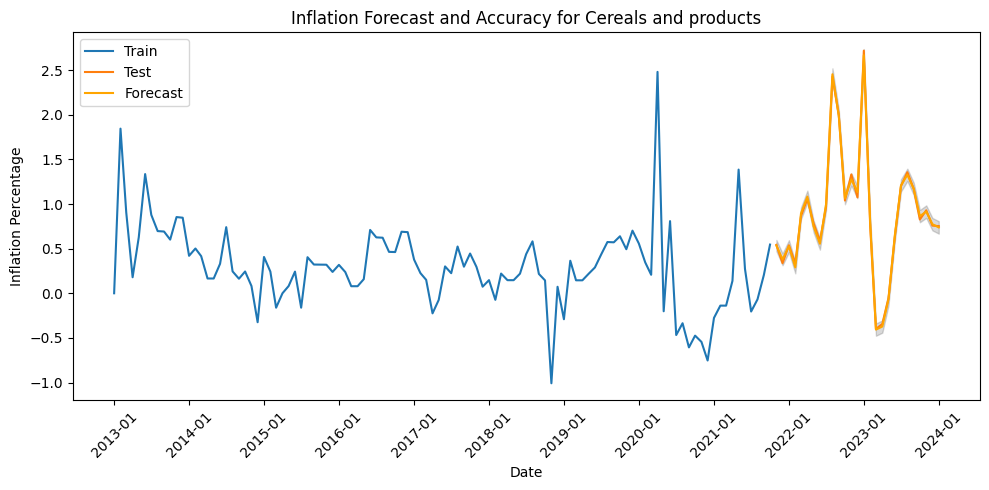

Forecasting and evaluating accuracy for Clothing
MAE: 0.02149680294205673, MSE: 0.0006746956090733556, RMSE: 0.025974903446853378


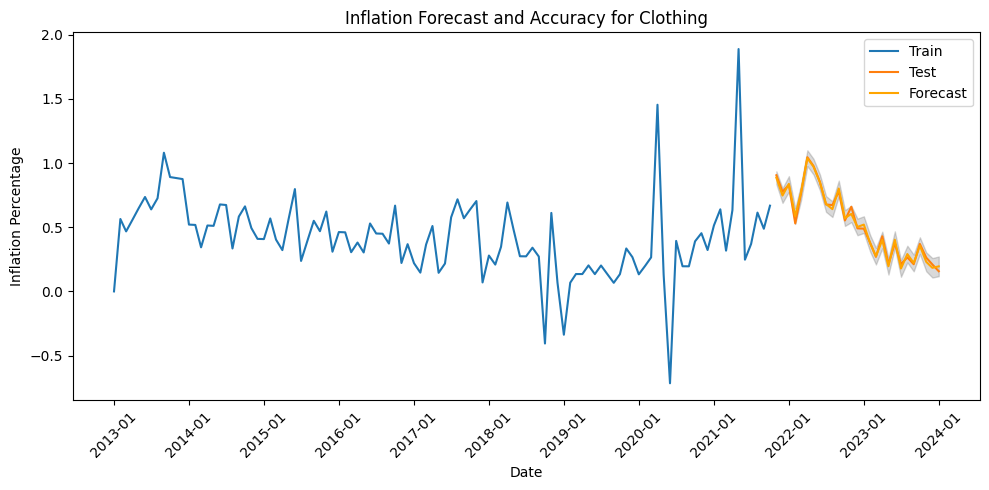

Forecasting and evaluating accuracy for Clothing and footwear
MAE: 0.02109400624088339, MSE: 0.0006206980789008242, RMSE: 0.024913813014085663


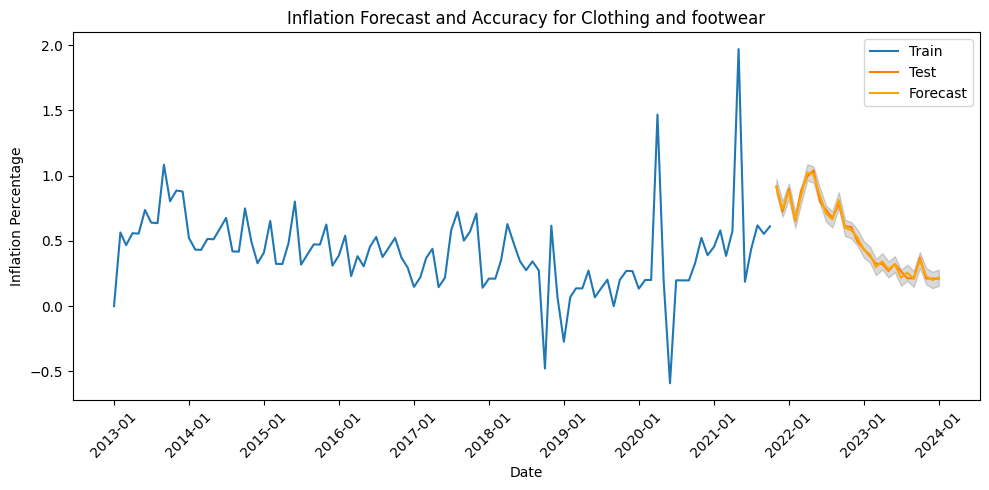

Forecasting and evaluating accuracy for Consumer Food Price Index
MAE: 0.02932071153116393, MSE: 0.0012361396912085505, RMSE: 0.03515877829516478


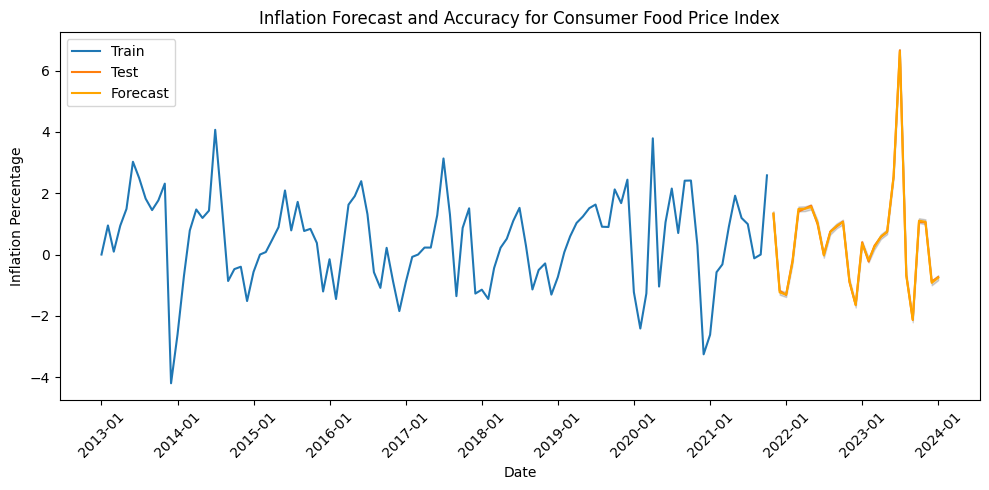

Forecasting and evaluating accuracy for Education
MAE: 0.017770731641863775, MSE: 0.000531770376782355, RMSE: 0.023060146937570778


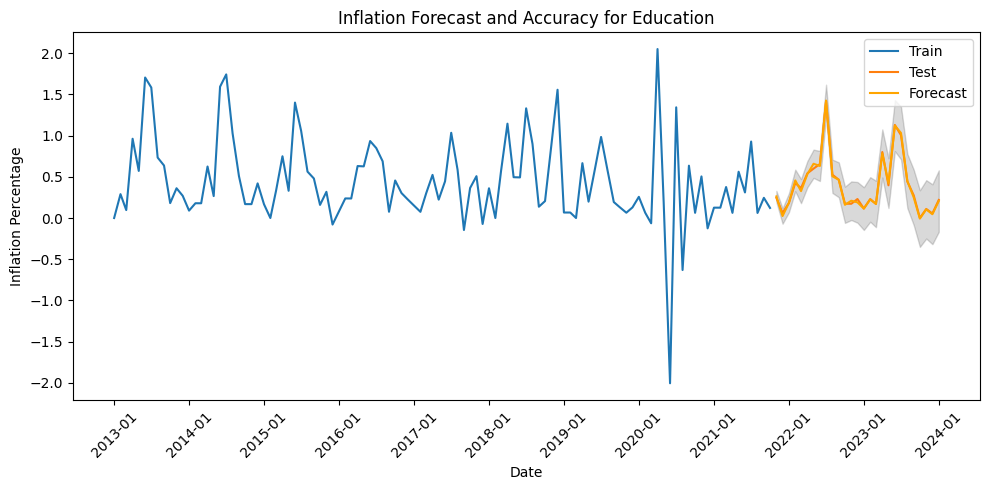

Forecasting and evaluating accuracy for Egg
MAE: 0.019770964495791774, MSE: 0.0006439551974299569, RMSE: 0.025376272331253794


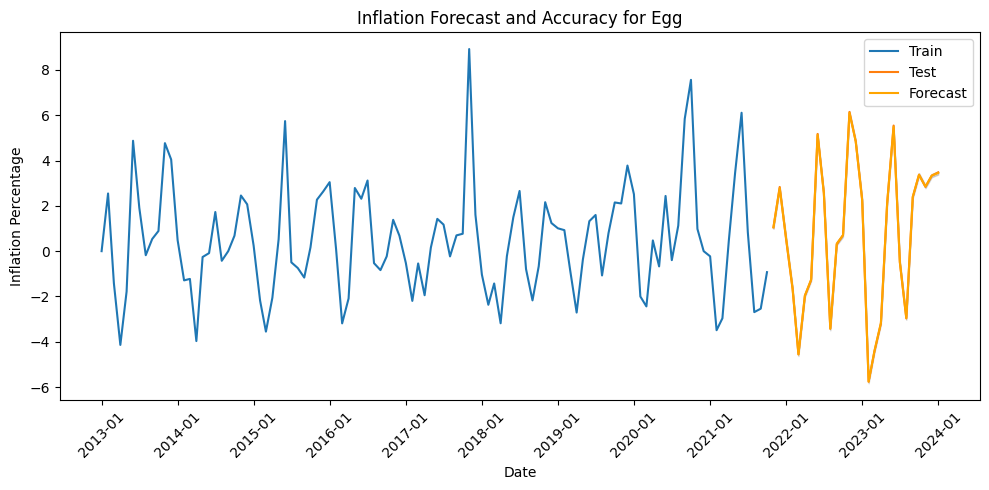

Forecasting and evaluating accuracy for Food and beverages
MAE: 0.018179915283318453, MSE: 0.0005033670483171932, RMSE: 0.022435842937522835


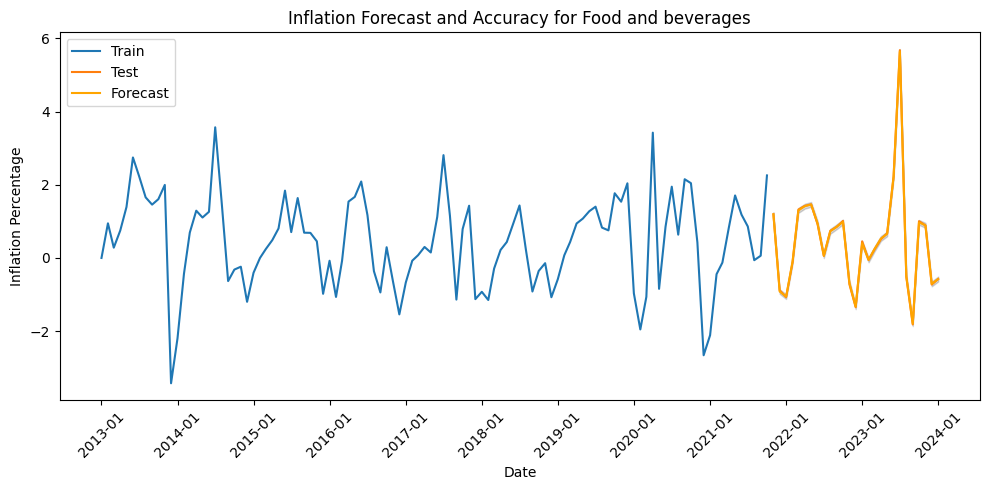

Forecasting and evaluating accuracy for Footwear
MAE: 0.020944780960061155, MSE: 0.0007456977627999468, RMSE: 0.027307467161931127


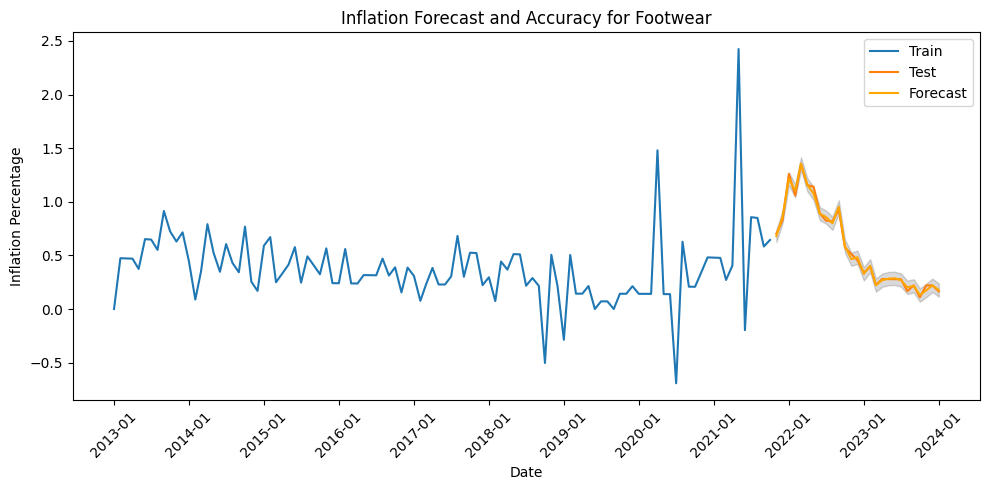

Forecasting and evaluating accuracy for Fruits
MAE: 0.03089894668741661, MSE: 0.0013717506772180587, RMSE: 0.03703715266078183


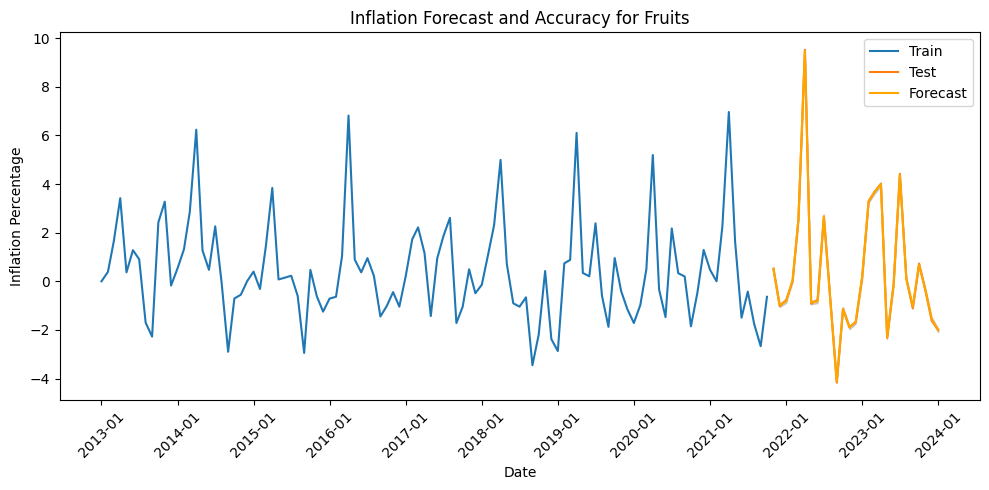

Forecasting and evaluating accuracy for Fuel and light
MAE: 0.025286395003879945, MSE: 0.001215793124961419, RMSE: 0.034868225147853725


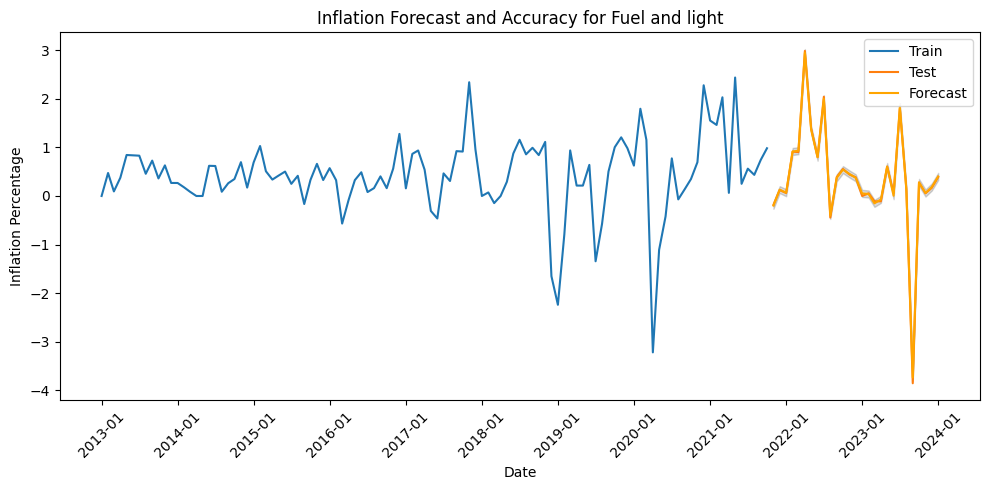

Forecasting and evaluating accuracy for General Index (All Groups)
MAE: 0.018526059366300526, MSE: 0.0006495132540996805, RMSE: 0.02548554990773557


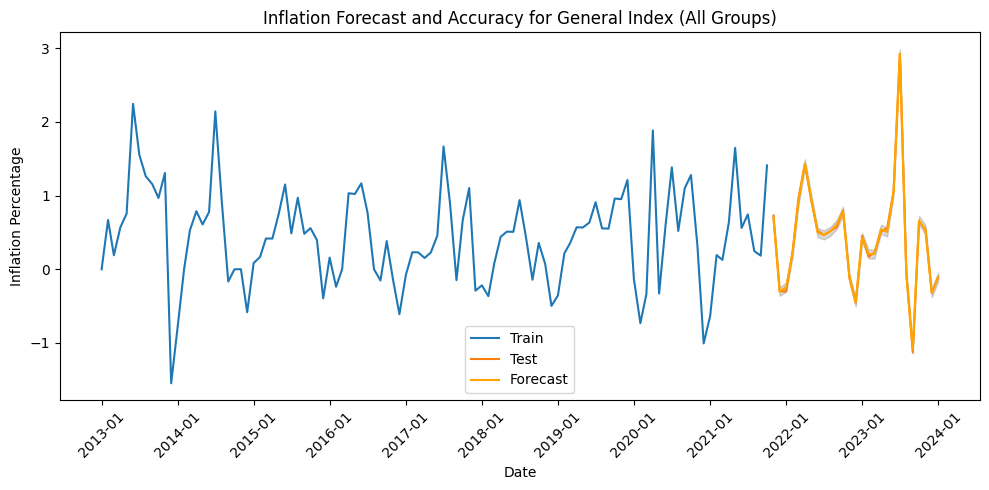

Forecasting and evaluating accuracy for Health
MAE: 0.019692732124908897, MSE: 0.0006300851035224534, RMSE: 0.02510149604152018


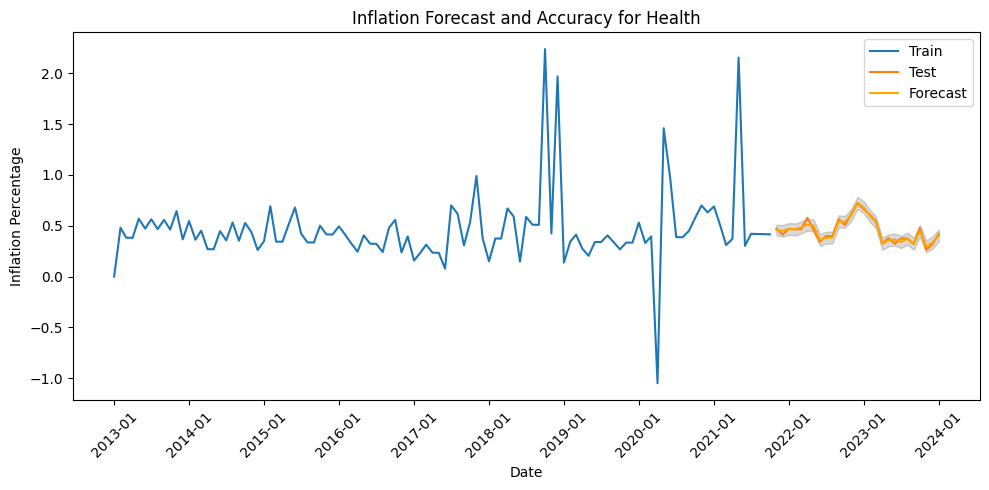

Forecasting and evaluating accuracy for Household goods and services
MAE: 0.01602158300874274, MSE: 0.0003642558310813334, RMSE: 0.019085487446783574


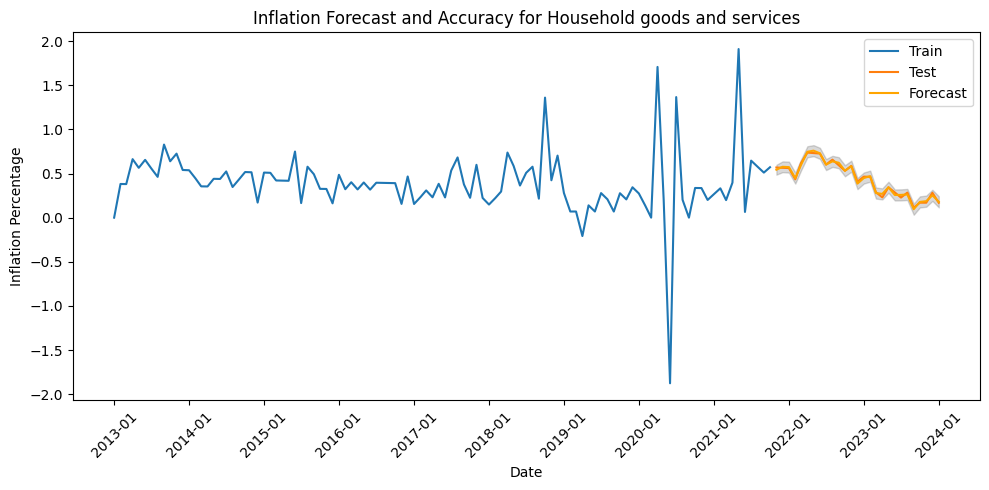

Forecasting and evaluating accuracy for Housing
MAE: 0.0, MSE: 0.0, RMSE: 0.0


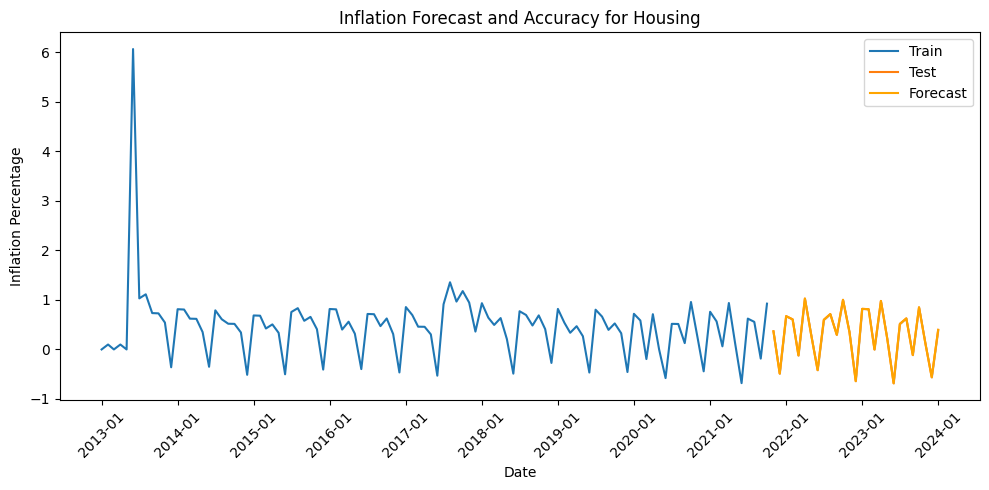

Forecasting and evaluating accuracy for Meat and fish
MAE: 0.019875957502086625, MSE: 0.0005997623864467598, RMSE: 0.024490046681187844


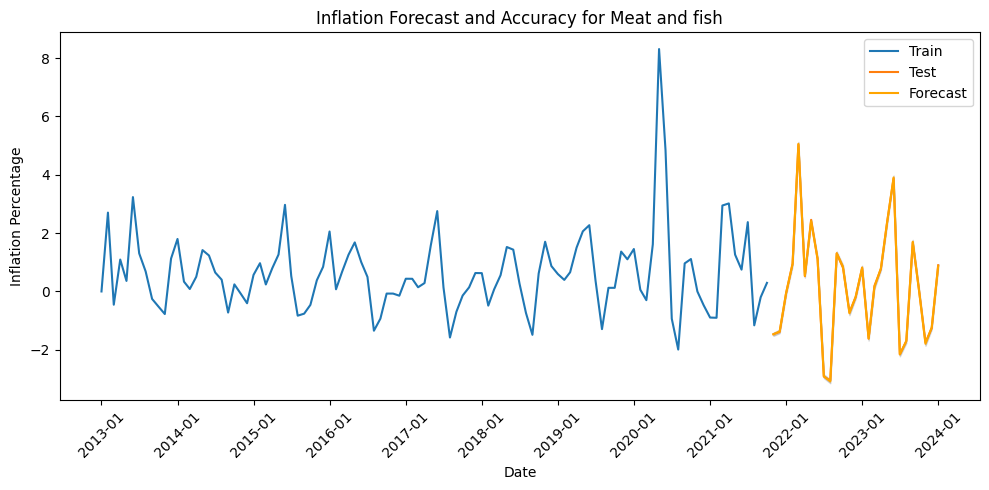

Forecasting and evaluating accuracy for Milk and products
MAE: 0.01906627130761857, MSE: 0.000519267744106544, RMSE: 0.022787447073038786


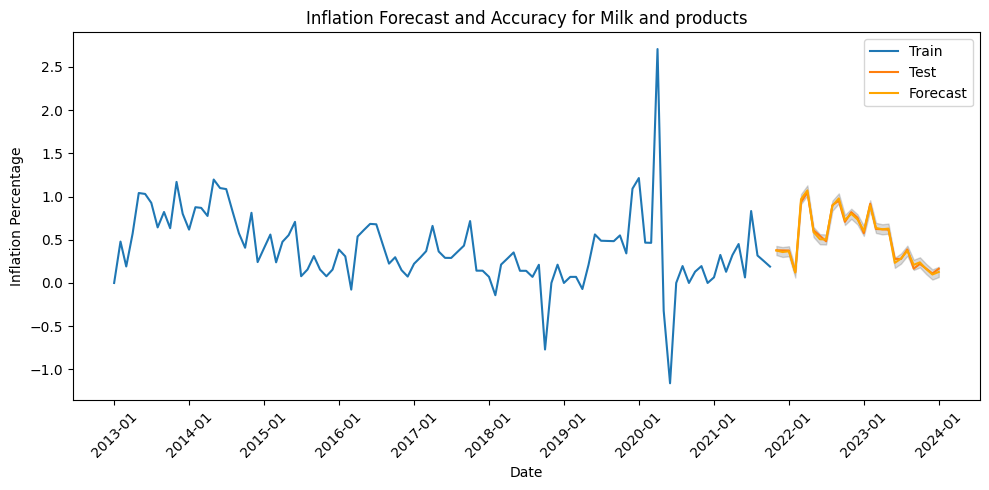

Forecasting and evaluating accuracy for Miscellaneous
MAE: 0.01984730355893112, MSE: 0.0005873256079997493, RMSE: 0.024234801587794137


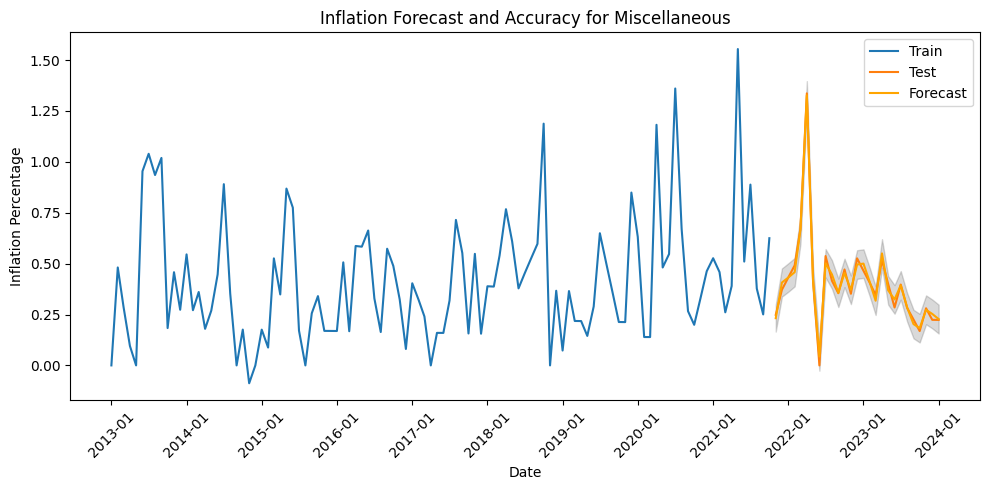

Forecasting and evaluating accuracy for Non-alcoholic beverages
MAE: 0.01786705876560013, MSE: 0.0005252412200548509, RMSE: 0.02291814172342188


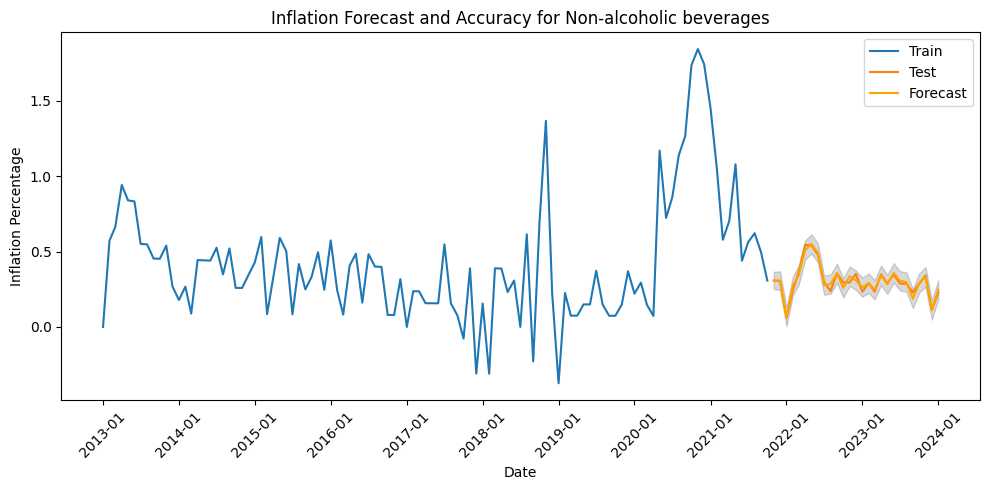

Forecasting and evaluating accuracy for Oils and fats
MAE: 0.022898949838022216, MSE: 0.0006583958015413308, RMSE: 0.025659224492204178


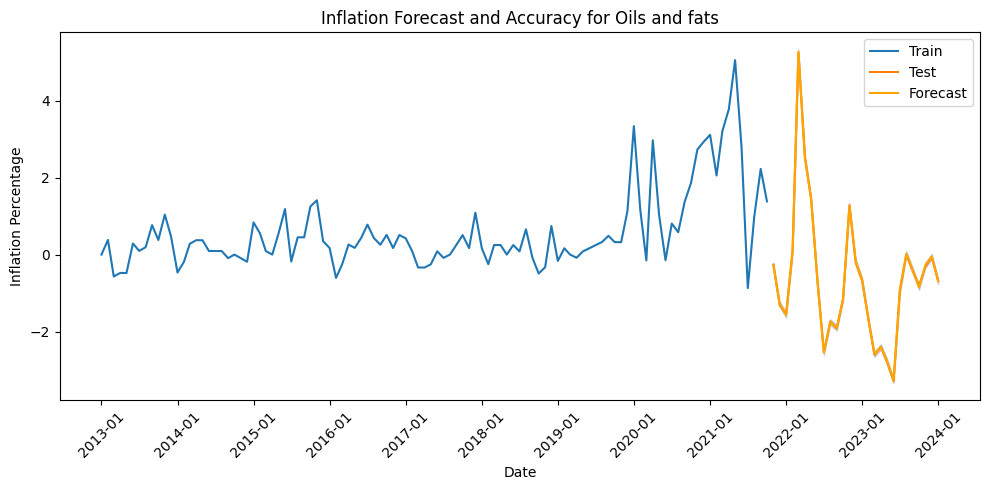

Forecasting and evaluating accuracy for Pan; tobacco; and intoxicants
MAE: 0.014750828190972506, MSE: 0.0004303891274156492, RMSE: 0.020745821926731398


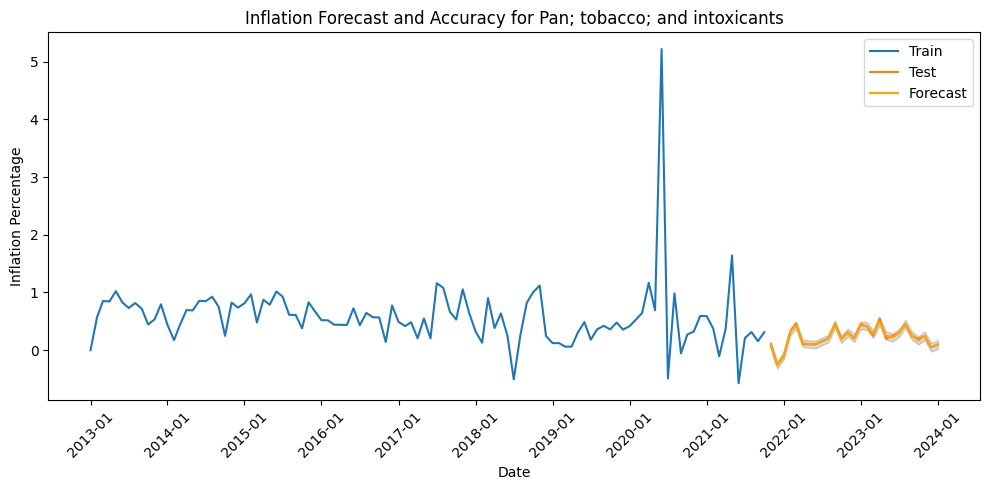

Forecasting and evaluating accuracy for Personal care and effects
MAE: 0.01883433992196772, MSE: 0.0005590260901259915, RMSE: 0.023643732576012433


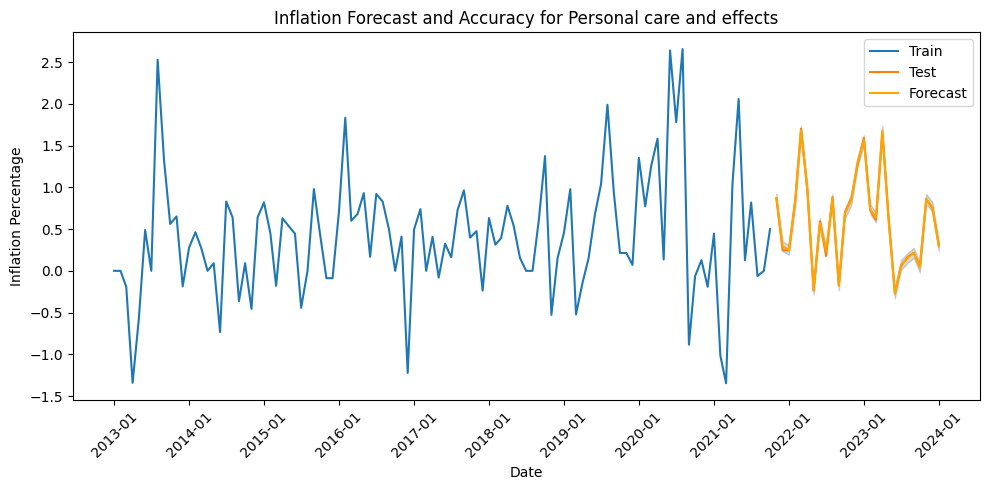

Forecasting and evaluating accuracy for Prepared meals; snacks; sweets etc.
MAE: 0.017645350066606315, MSE: 0.000485962961375154, RMSE: 0.02204456761597183


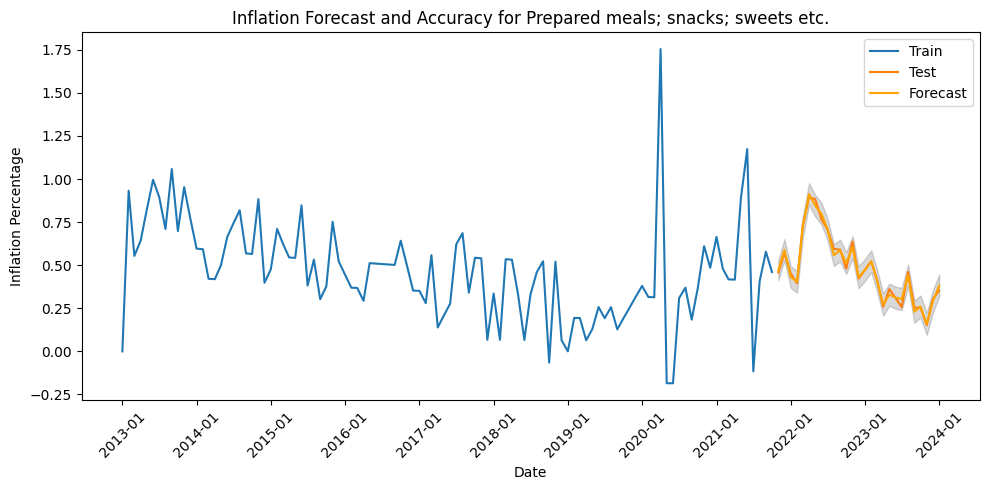

Forecasting and evaluating accuracy for Pulses and products
MAE: 0.01758549828952127, MSE: 0.00048500755106408886, RMSE: 0.02202288698295682


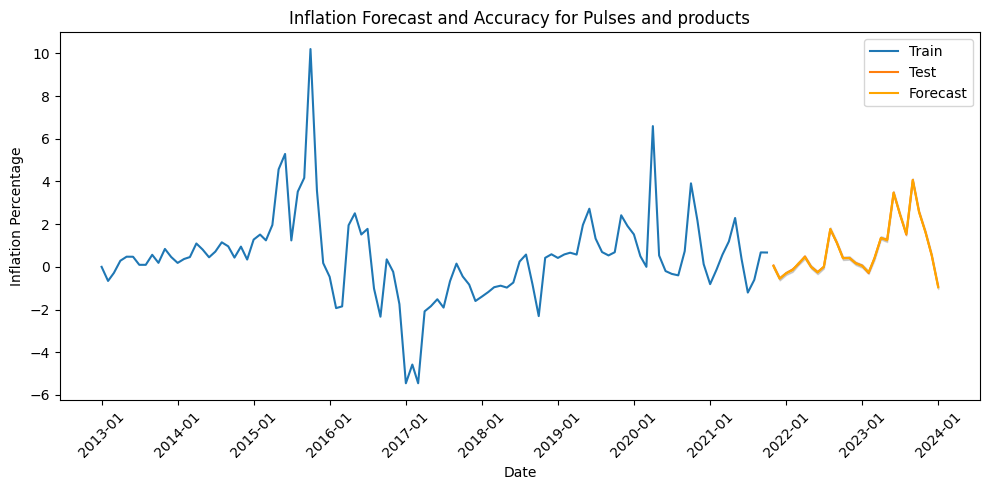

Forecasting and evaluating accuracy for Recreation and amusement
MAE: 0.01793727599826314, MSE: 0.0004572974815578027, RMSE: 0.02138451499468255


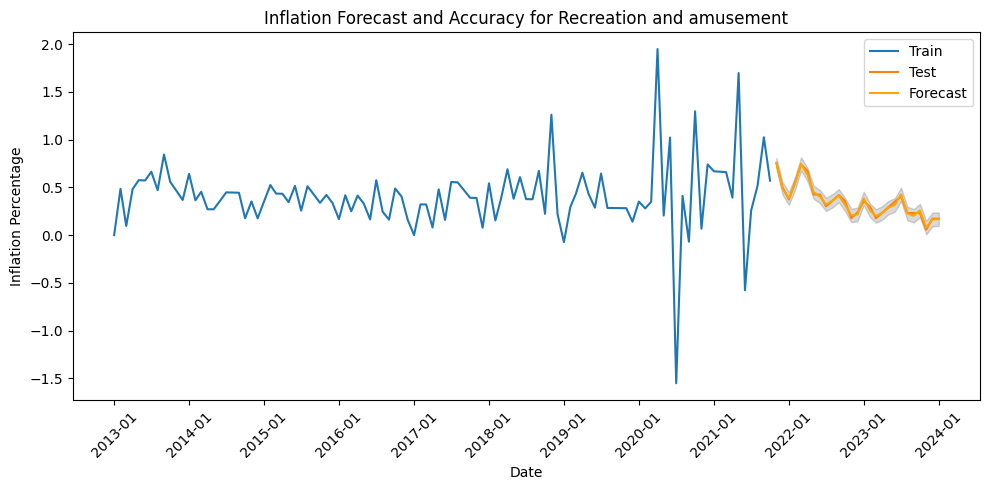

Forecasting and evaluating accuracy for Spices
MAE: 0.02271392447942007, MSE: 0.000732332313712518, RMSE: 0.02706163915420716


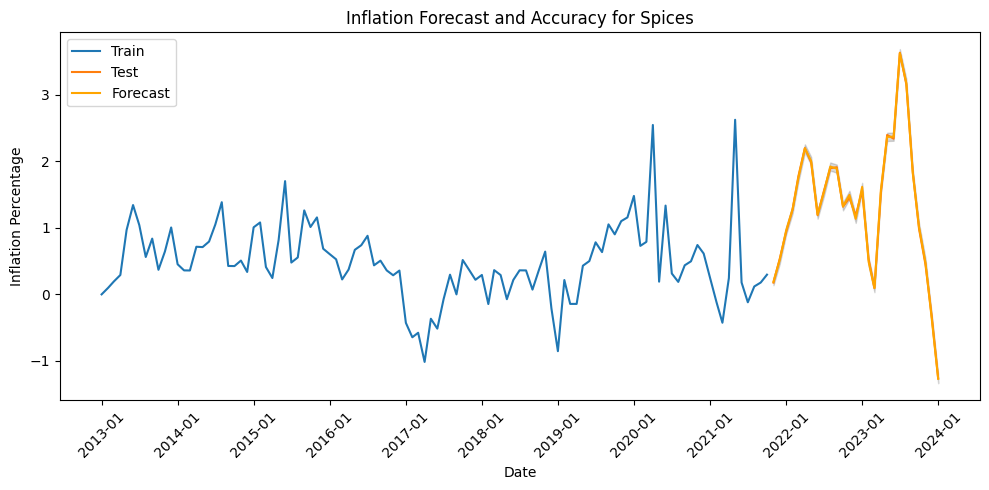

Forecasting and evaluating accuracy for Sugar and confectionery
MAE: 0.025577824141879906, MSE: 0.0009597990487129918, RMSE: 0.03098062376249051


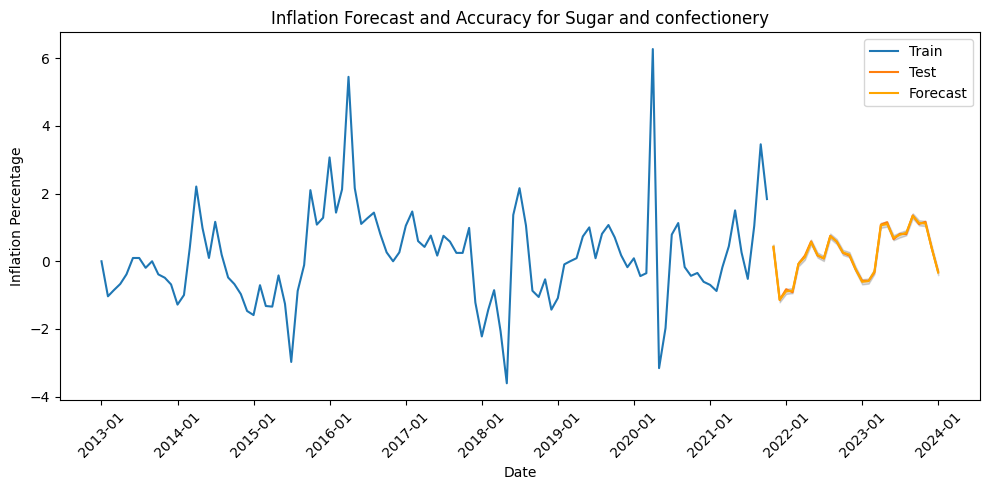

Forecasting and evaluating accuracy for Transport and communication
MAE: 0.016210359297611568, MSE: 0.0004594025721384771, RMSE: 0.021433678455609926


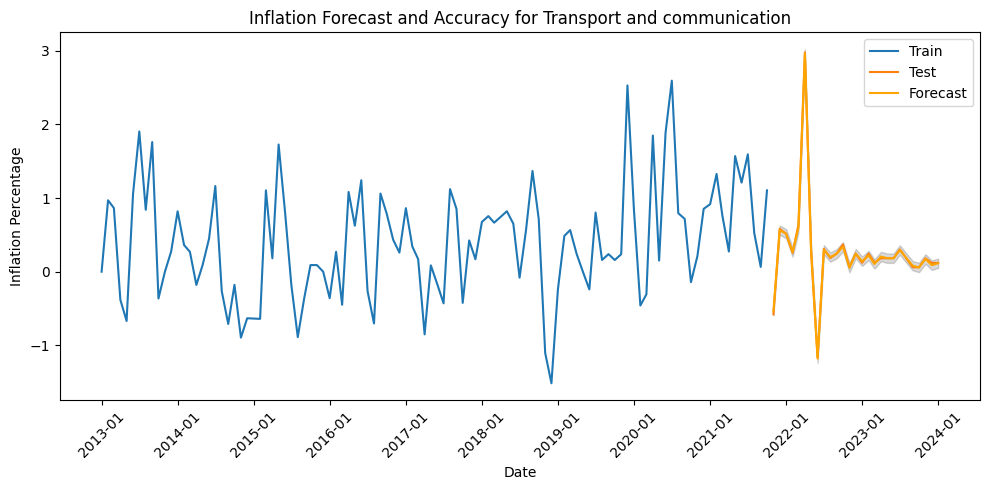

Forecasting and evaluating accuracy for Vegetables
MAE: 0.06007302716217971, MSE: 0.006403553150731223, RMSE: 0.08002220411067933


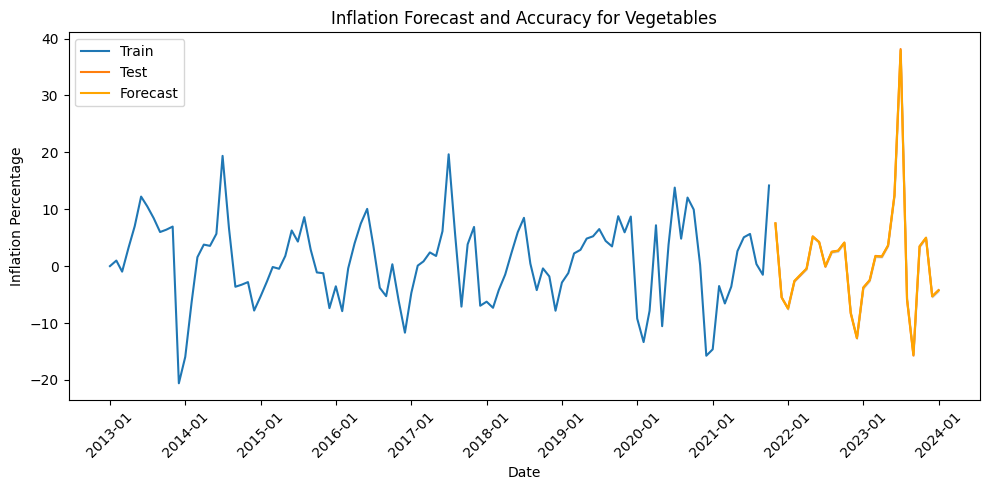

Cereals and products: MAE = 0.025946756361965636, MSE = 0.0009204794769053655, RMSE = 0.03033940468936999
Clothing: MAE = 0.02149680294205673, MSE = 0.0006746956090733556, RMSE = 0.025974903446853378
Clothing and footwear: MAE = 0.02109400624088339, MSE = 0.0006206980789008242, RMSE = 0.024913813014085663
Consumer Food Price Index: MAE = 0.02932071153116393, MSE = 0.0012361396912085505, RMSE = 0.03515877829516478
Education: MAE = 0.017770731641863775, MSE = 0.000531770376782355, RMSE = 0.023060146937570778
Egg: MAE = 0.019770964495791774, MSE = 0.0006439551974299569, RMSE = 0.025376272331253794
Food and beverages: MAE = 0.018179915283318453, MSE = 0.0005033670483171932, RMSE = 0.022435842937522835
Footwear: MAE = 0.020944780960061155, MSE = 0.0007456977627999468, RMSE = 0.027307467161931127
Fruits: MAE = 0.03089894668741661, MSE = 0.0013717506772180587, RMSE = 0.03703715266078183
Fuel and light: MAE = 0.025286395003879945, MSE = 0.001215793124961419, RMSE = 0.034868225147853725
General

In [49]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

def train_and_forecast(dataframe, category, steps=12):
    # Split the data into train and test
    category_df = dataframe[dataframe['Description'] == category]
    train_size = int(len(category_df) * 0.8)  # 80% of data for training
    train, test = category_df.iloc[:train_size], category_df.iloc[train_size:]
    
    exog_data = train[['rural_inf_percentage', 'urban_inf_percentage']]
    exog_train = exog_data.loc[train.index]
    # Before forecasting, prepare the exogenous variables for the test set
    exog_test = test[['rural_inf_percentage', 'urban_inf_percentage']]

    # Fit the SARIMAX model on the training data
    model = SARIMAX(train['combined_inf_percentage'], exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    
    # Forecast
    forecast = model_fit.get_forecast(steps=len(test), exog=exog_test)
    forecast_ci = forecast.conf_int()
    
    # Calculate accuracy metrics
    test['forecast'] = forecast.predicted_mean
    mae = mean_absolute_error(test['combined_inf_percentage'], test['forecast'])
    mse = mean_squared_error(test['combined_inf_percentage'], test['forecast'])
    rmse = np.sqrt(mse)
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
    
    # Plot the historical data and forecast with confidence intervals
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train['combined_inf_percentage'], label='Train')
    plt.plot(test.index, test['combined_inf_percentage'], label='Test')
    plt.plot(test.index, test['forecast'], label='Forecast', color='orange')
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.15)
    
    # Add title and labels
    plt.title(f'Inflation Forecast and Accuracy for {category}')
    plt.xlabel('Date')
    plt.ylabel('Inflation Percentage')
    
    # Format the dates on x-axis
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=15))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.legend()
    plt.show()
    
    return mae, mse, rmse

# Run the forecasting and accuracy evaluation for each category
categories = df['Description'].unique()
accuracy_metrics = {}
for category in categories:
    print(f"Forecasting and evaluating accuracy for {category}")
    mae, mse, rmse = train_and_forecast(df, category)
    accuracy_metrics[category] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Display the accuracy metrics for each category
for category, metrics in accuracy_metrics.items():
    print(f"{category}: MAE = {metrics['MAE']}, MSE = {metrics['MSE']}, RMSE = {metrics['RMSE']}")


In [50]:
# Assuming 'models' is a dictionary with your trained SARIMAX models

for category, model in models.items():
    # This will save the model in a binary format .pkl
    model.save(f"models/{category.replace(' ', '_')}_model.pkl")
